Car Model detection using YOLOv3 darknet
---

In [ ]:
!apt update
!apt upgrade -y
!uname -m && cat /etc/*release
!gcc --version
!uname -r

Get:1 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:2 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:3 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:4 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:5 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:6 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Hit:7 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get:8 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease [21.3 kB]
Get:9 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:11 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:12 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [696 B]
Hit:13 https://developer.

In [ ]:
ls

sample_data/


To access Google Drive Folder and Files

In [ ]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Mounted at /content/drive


**Original Version of Darknet**

In [ ]:
!git clone https://github.com/pjreddie/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 5943, done.
remote: Total 5943 (delta 0), reused 0 (delta 0), pack-reused 5943
Receiving objects: 100% (5943/5943), 6.37 MiB | 26.18 MiB/s, done.
Resolving deltas: 100% (3926/3926), done.


In [ ]:
%ls

darknet/  drive/  sample_data/


In [ ]:
%rm -r darknet

**Modify Version of Darknet**

In [ ]:
!git clone https://github.com/AlexeyAB/darknet/
%cd darknet/

Cloning into 'darknet'...
remote: Enumerating objects: 15395, done.
remote: Total 15395 (delta 0), reused 0 (delta 0), pack-reused 15395
Receiving objects: 100% (15395/15395), 14.03 MiB | 5.60 MiB/s, done.
Resolving deltas: 100% (10346/10346), done.
/content/darknet


In [ ]:
!apt install libopencv-dev python-opencv ffmpeg

Reading package lists... Done
Building dependency tree       
Reading state information... Done
ffmpeg is already the newest version (7:3.4.8-0ubuntu0.2).
libopencv-dev is already the newest version (3.2.0+dfsg-4ubuntu0.1).
You might want to run 'apt --fix-broken install' to correct these.
The following packages have unmet dependencies:
 nvidia-dkms-510 : Depends: nvidia-kernel-common-510 (>= 510.54) but 510.47.03-0ubuntu1 is to be installed
 nvidia-driver-510 : Depends: nvidia-kernel-common-510 (>= 510.54) but 510.47.03-0ubuntu1 is to be installed
                     Recommends: nvidia-prime (>= 0.8) but it is not going to be installed
                     Recommends: libnvidia-compute-510:i386 (= 510.54-0ubuntu0.18.04.1)
                     Recommends: libnvidia-decode-510:i386 (= 510.54-0ubuntu0.18.04.1)
                     Recommends: libnvidia-encode-510:i386 (= 510.54-0ubuntu0.18.04.1)
                     Recommends: libnvidia-fbc1-510:i386 (= 510.54-0ubuntu0.18.04.1)
       

Changing the variables to include OpenCV and GPU in the Makefile

In [ ]:
!sed -i 's/OPENCV=0/OPENCV=1/g' Makefile
!sed -i 's/GPU=0/GPU=1/g' Makefile

In [ ]:
>>Mnaual Intervention neededto correct file <<

SyntaxError: ignored

In [ ]:
%pycat Makefile

In [ ]:
!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:946:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1147:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
             ^~
./src/image_opencv.cpp:1150:10: note: ...this statement

**How to train (to detect your custom objects):**
---

**Training Yolo v3:**

1.Create file yolo-obj.cfg with the same content as in yolov3.cfg (or copy yolov3.cfg to yolo-obj.cfg) and:

* change line batch to batch=64
* change line subdivisions to subdivisions=8
* change line classes=80 to your number of objects in each of 3 [yolo]-layers:
  * yolov3.cfg#L610
  * yolov3.cfg#L696
  * yolov3.cfg#L783
* change [filters=255] to filters=(classes + 5)x3 in the 3 [convolutional] before each [yolo] layer
  * yolov3.cfg#L603
  * yolov3.cfg#L689
  * yolov3.cfg#L776
  
So if classes=1 then should be filters=18. If classes=2 then write filters=21.

In [ ]:
%pwd

'/content/darknet'

In [ ]:
%cp cfg/yolov3.cfg cfg/yolo-obj.cfg

In [ ]:
%cp cfg/yolov3.cfg cfg/yolo-obj.cfg
!sed -i 's/batch=1/batch=64/g' cfg/yolo-obj.cfg
!sed -i 's/subdivisions=1/subdivisions=32/g' cfg/yolo-obj.cfg
!sed -i 's/classes=80/classes=196/g' cfg/yolo-obj.cfg
!sed -i 's/filters=255/filters=603/g' cfg/yolo-obj.cfg
!sed -i 's/width=416/width=608/g' cfg/yolo-obj.cfg
!sed -i 's/height=416/height=608/g' cfg/yolo-obj.cfg

In [ ]:
%pycat cfg/yolo-obj.cfg

2.Create file obj.names in the directory `build\darknet\x64\data\` with objects names - each in new line



In [ ]:
all_classes="""AM General Hummer SUV 2000
Acura RL Sedan 2012
Acura TL Sedan 2012
Acura TL Type-S 2008
Acura TSX Sedan 2012
Acura Integra Type R 2001
Acura ZDX Hatchback 2012
Aston Martin V8 Vantage Convertible 2012
Aston Martin V8 Vantage Coupe 2012
Aston Martin Virage Convertible 2012
Aston Martin Virage Coupe 2012
Audi RS 4 Convertible 2008
Audi A5 Coupe 2012
Audi TTS Coupe 2012
Audi R8 Coupe 2012
Audi V8 Sedan 1994
Audi 100 Sedan 1994
Audi 100 Wagon 1994
Audi TT Hatchback 2011
Audi S6 Sedan 2011
Audi S5 Convertible 2012
Audi S5 Coupe 2012
Audi S4 Sedan 2012
Audi S4 Sedan 2007
Audi TT RS Coupe 2012
BMW ActiveHybrid 5 Sedan 2012
BMW 1 Series Convertible 2012
BMW 1 Series Coupe 2012
BMW 3 Series Sedan 2012
BMW 3 Series Wagon 2012
BMW 6 Series Convertible 2007
BMW X5 SUV 2007
BMW X6 SUV 2012
BMW M3 Coupe 2012
BMW M5 Sedan 2010
BMW M6 Convertible 2010
BMW X3 SUV 2012
BMW Z4 Convertible 2012
Bentley Continental Supersports Conv. Convertible 2012
Bentley Arnage Sedan 2009
Bentley Mulsanne Sedan 2011
Bentley Continental GT Coupe 2012
Bentley Continental GT Coupe 2007
Bentley Continental Flying Spur Sedan 2007
Bugatti Veyron 16.4 Convertible 2009
Bugatti Veyron 16.4 Coupe 2009
Buick Regal GS 2012
Buick Rainier SUV 2007
Buick Verano Sedan 2012
Buick Enclave SUV 2012
Cadillac CTS-V Sedan 2012
Cadillac SRX SUV 2012
Cadillac Escalade EXT Crew Cab 2007
Chevrolet Silverado 1500 Hybrid Crew Cab 2012
Chevrolet Corvette Convertible 2012
Chevrolet Corvette ZR1 2012
Chevrolet Corvette Ron Fellows Edition Z06 2007
Chevrolet Traverse SUV 2012
Chevrolet Camaro Convertible 2012
Chevrolet HHR SS 2010
Chevrolet Impala Sedan 2007
Chevrolet Tahoe Hybrid SUV 2012
Chevrolet Sonic Sedan 2012
Chevrolet Express Cargo Van 2007
Chevrolet Avalanche Crew Cab 2012
Chevrolet Cobalt SS 2010
Chevrolet Malibu Hybrid Sedan 2010
Chevrolet TrailBlazer SS 2009
Chevrolet Silverado 2500HD Regular Cab 2012
Chevrolet Silverado 1500 Classic Extended Cab 2007
Chevrolet Express Van 2007
Chevrolet Monte Carlo Coupe 2007
Chevrolet Malibu Sedan 2007
Chevrolet Silverado 1500 Extended Cab 2012
Chevrolet Silverado 1500 Regular Cab 2012
Chrysler Aspen SUV 2009
Chrysler Sebring Convertible 2010
Chrysler Town and Country Minivan 2012
Chrysler 300 SRT-8 2010
Chrysler Crossfire Convertible 2008
Chrysler PT Cruiser Convertible 2008
Daewoo Nubira Wagon 2002
Dodge Caliber Wagon 2012
Dodge Caliber Wagon 2007
Dodge Caravan Minivan 1997
Dodge Ram Pickup 3500 Crew Cab 2010
Dodge Ram Pickup 3500 Quad Cab 2009
Dodge Sprinter Cargo Van 2009
Dodge Journey SUV 2012
Dodge Dakota Crew Cab 2010
Dodge Dakota Club Cab 2007
Dodge Magnum Wagon 2008
Dodge Challenger SRT8 2011
Dodge Durango SUV 2012
Dodge Durango SUV 2007
Dodge Charger Sedan 2012
Dodge Charger SRT-8 2009
Eagle Talon Hatchback 1998
FIAT 500 Abarth 2012
FIAT 500 Convertible 2012
Ferrari FF Coupe 2012
Ferrari California Convertible 2012
Ferrari 458 Italia Convertible 2012
Ferrari 458 Italia Coupe 2012
Fisker Karma Sedan 2012
Ford F-450 Super Duty Crew Cab 2012
Ford Mustang Convertible 2007
Ford Freestar Minivan 2007
Ford Expedition EL SUV 2009
Ford Edge SUV 2012
Ford Ranger SuperCab 2011
Ford GT Coupe 2006
Ford F-150 Regular Cab 2012
Ford F-150 Regular Cab 2007
Ford Focus Sedan 2007
Ford E-Series Wagon Van 2012
Ford Fiesta Sedan 2012
GMC Terrain SUV 2012
GMC Savana Van 2012
GMC Yukon Hybrid SUV 2012
GMC Acadia SUV 2012
GMC Canyon Extended Cab 2012
Geo Metro Convertible 1993
HUMMER H3T Crew Cab 2010
HUMMER H2 SUT Crew Cab 2009
Honda Odyssey Minivan 2012
Honda Odyssey Minivan 2007
Honda Accord Coupe 2012
Honda Accord Sedan 2012
Hyundai Veloster Hatchback 2012
Hyundai Santa Fe SUV 2012
Hyundai Tucson SUV 2012
Hyundai Veracruz SUV 2012
Hyundai Sonata Hybrid Sedan 2012
Hyundai Elantra Sedan 2007
Hyundai Accent Sedan 2012
Hyundai Genesis Sedan 2012
Hyundai Sonata Sedan 2012
Hyundai Elantra Touring Hatchback 2012
Hyundai Azera Sedan 2012
Infiniti G Coupe IPL 2012
Infiniti QX56 SUV 2011
Isuzu Ascender SUV 2008
Jaguar XK XKR 2012
Jeep Patriot SUV 2012
Jeep Wrangler SUV 2012
Jeep Liberty SUV 2012
Jeep Grand Cherokee SUV 2012
Jeep Compass SUV 2012
Lamborghini Reventon Coupe 2008
Lamborghini Aventador Coupe 2012
Lamborghini Gallardo LP 570-4 Superleggera 2012
Lamborghini Diablo Coupe 2001
Land Rover Range Rover SUV 2012
Land Rover LR2 SUV 2012
Lincoln Town Car Sedan 2011
MINI Cooper Roadster Convertible 2012
Maybach Landaulet Convertible 2012
Mazda Tribute SUV 2011
McLaren MP4-12C Coupe 2012
Mercedes-Benz 300-Class Convertible 1993
Mercedes-Benz C-Class Sedan 2012
Mercedes-Benz SL-Class Coupe 2009
Mercedes-Benz E-Class Sedan 2012
Mercedes-Benz S-Class Sedan 2012
Mercedes-Benz Sprinter Van 2012
Mitsubishi Lancer Sedan 2012
Nissan Leaf Hatchback 2012
Nissan NV Passenger Van 2012
Nissan Juke Hatchback 2012
Nissan 240SX Coupe 1998
Plymouth Neon Coupe 1999
Porsche Panamera Sedan 2012
Ram C/V Cargo Van Minivan 2012
Rolls-Royce Phantom Drophead Coupe Convertible 2012
Rolls-Royce Ghost Sedan 2012
Rolls-Royce Phantom Sedan 2012
Scion xD Hatchback 2012
Spyker C8 Convertible 2009
Spyker C8 Coupe 2009
Suzuki Aerio Sedan 2007
Suzuki Kizashi Sedan 2012
Suzuki SX4 Hatchback 2012
Suzuki SX4 Sedan 2012
Tesla Model S Sedan 2012
Toyota Sequoia SUV 2012
Toyota Camry Sedan 2012
Toyota Corolla Sedan 2012
Toyota 4Runner SUV 2012
Volkswagen Golf Hatchback 2012
Volkswagen Golf Hatchback 1991
Volkswagen Beetle Hatchback 2012
Volvo C30 Hatchback 2012
Volvo 240 Sedan 1993
Volvo XC90 SUV 2007 
smart fortwo Convertible 2012
"""

In [ ]:
#all_classes = """Gun
#"""

file = """text_file = open("build/darknet/x64/data/obj.names", "w");text_file.write(all_classes);text_file.close()""" 

exec(file)
%pycat build/darknet/x64/data/obj.names

3.Create file obj.data in the directory `build\darknet\x64\data\` containing (where classes = number of objects):

In [ ]:
obj_data = """classes= 196
train  = build/darknet/x64/data/train.txt
valid  = build/darknet/x64/data/valid.txt
names = build/darknet/x64/data/obj.names
backup = build/darknet/x64/backup/
"""

file = """text_file = open("build/darknet/x64/data/obj.data", "w");text_file.write(obj_data);text_file.close()""" 

exec(file)
%pycat build/darknet/x64/data/obj.data

4.Put image-files (.jpg) of your objects in the directory build/darknet/x64/data/obj/


### 1.1 Import necessary libraries

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import sys
import numpy as np
import seaborn as sns
import statistics as stats
sns.set(color_codes=True)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
#Last import allows multiple outputs from one cell
import warnings
# Initialize the random number generator
import random
random.seed(0)

#Additional libs
import matplotlib.patches as patches


In [ ]:
# Useful Configuration/Setting

# suppress display of warnings
warnings.filterwarnings('ignore')

# display all dataframe columns
pd.options.display.max_columns = None

# to set the limit to 3 decimals
pd.options.display.float_format = '{:.7f}'.format

# display all dataframe rows
pd.options.display.max_rows = None

#Setting to shows all entries in array displayed
np.set_printoptions(threshold=sys.maxsize)

In [ ]:
# First create a copy function we can use 

# importing shutil module
import shutil

def copyFileFunc(source,destination):
              # Source path
              #source = "/content/darknet/cfg/yolov3.cfg"
 
              # Destination path
              #destination = "/content/darknet/custom_data/cfg/yolov3-custom.cfg"
 
              # Copy the content of
              # source to destination
 
              try:
                  shutil.copyfile(source, destination)
                  print("File copied successfully.")
 
                  # If source and destination are same
              except shutil.SameFileError:
                print("Source and destination represents the same file.")
 
                  # If destination is a directory.
              except IsADirectoryError:
                print("Destination is a directory.")
 
                  # If there is any permission issue
              except PermissionError:
                print("Permission denied.")
 
                  # For other errors
              except:
                print("Error occurred while copying file.")

In [ ]:
%mkdir build/darknet/x64/data/obj

In [ ]:
# Read The Data Set
import os

images_path = "/content/drive/MyDrive/Capstone/Car Images/Car Images/"
all_folders_train= os.listdir(images_path+'Train Images')

In [ ]:
#Lets read the Train Annotations

#Lets give our own column names as excel sheet does not have proper column names
columnNameList=['Image_Name','cor1','cor2','cor3','cor4','Image_Class']
trainAnno= pd.read_csv('/content/drive/MyDrive/Capstone/Annotations/Train Annotations.csv',names=columnNameList)
trainAnno.head(5)

Image_Name                      cor1        cor2         cor3         cor4  \
0  Image Name  Bounding Box coordinates         NaN          NaN          NaN   
1   00001.jpg                        39 116.0000000  569.0000000  375.0000000   
2   00002.jpg                        36 116.0000000  868.0000000  587.0000000   
3   00003.jpg                        85 109.0000000  601.0000000  381.0000000   
4   00004.jpg                       621 393.0000000 1484.0000000 1096.0000000   

   Image_Class  
0  Image class  
1           14  
2            3  
3           91  
4          134

In [ ]:
import matplotlib.image as img
import cv2

#Lets initialize a counter
counter=-1
fileNamesTrain=[]
#Annotation Dict
annot={}

for i in all_folders_train:
  eachFolder=os.listdir(images_path+'Train Images/'+i)
  for eachFile in eachFolder:
    if(eachFile.find('(') != -1):
      print("Duplicate File: ",eachFile)
      continue;

    #Copy the file into darknet
    copyFileFunc(images_path+'Train Images/'+i+'/'+eachFile,'/content/darknet/build/darknet/x64/data/obj/'+eachFile)

    #List of file names in Train
    fileNamesTrain.append(eachFile)
    
    #Proceed
    counter=counter+1

    # reading png image file
    im = img.imread(images_path+'Train Images/'+i+'/'+eachFile)
    imgLength=im.shape[0]
    imgWidth=im.shape[1]


    # Getting coordinates
    #print("Processing Files :",eachFile)
    labelData=trainAnno[trainAnno['Image_Name']==eachFile]
    x0=int(labelData['cor1'])
    y0=int(labelData['cor2'])
    x1=int(labelData['cor3'])
    y1=int(labelData['cor4'])
    imageClass=labelData['Image_Class']
    x_center_coord=x0+(x1-x0)/2
    y_center_coord=y0+(y1-y0)/2


    #Lets create Darknet annotations
    object_class_id=int(imageClass)-1
    x_centre=x_center_coord/imgWidth
    y_centre=y_center_coord/imgLength
    w_bb=(x1-x0)/imgWidth
    h_bb=(y1-y0)/imgLength


    #Add to Annottaion Dictionary List
    annot[eachFile]=[object_class_id,x_centre,y_centre,w_bb,h_bb]

#Print counter 
print("Total no of files ",counter)

Streaming output truncated to the last 5000 lines.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied s

In [ ]:
# Above o/p
#Total no of files  8143

In [ ]:
# Lets create train.txt

train_file = open("build/darknet/x64/data/train.txt", "w")
for f_name in fileNamesTrain:  
      train_file.write("build/darknet/x64/data/obj/"+f_name+"\n");
      
train_file.close();


In [ ]:
# Lets create annot file for each image

for key, value in annot.items():
  key=key[0:-3]+'txt'
  image_annot_file = open('/content/darknet/build/darknet/x64/data/obj/'+key, "w")
  strAnnot=((str(value))[1:-1]).replace(',','')
  image_annot_file.write(strAnnot+"\n")
  image_annot_file.close()

63

47

60

81

81

63

67

59

69

53

81

80

61

80

80

55

79

58

80

54

69

63

63

55

60

56

79

63

51

59

80

40

53

42

67

80

56

66

27

80

80

79

79

81

55

79

81

80

54

82

80

68

46

53

79

55

79

66

79

45

53

80

53

80

80

68

69

46

59

80

52

79

80

32

64

67

80

81

80

80

29

60

42

81

42

80

44

66

52

65

79

52

54

53

80

66

79

81

81

55

66

79

81

54

67

80

80

59

81

59

80

80

53

78

56

68

31

64

79

80

54

80

80

65

80

54

81

80

79

53

54

56

79

53

80

81

80

69

69

80

78

54

65

81

80

67

80

61

59

71

81

54

80

65

65

80

80

80

27

80

48

69

65

54

67

53

55

67

68

45

66

51

81

81

80

79

29

48

70

51

57

50

79

66

81

40

54

80

82

81

54

80

80

66

41

46

61

68

52

45

80

65

59

80

53

61

54

80

62

63

59

80

59

62

63

80

40

61

53

67

63

48

51

61

53

39

59

80

62

48

79

41

60

69

63

56

56

79

80

80

60

53

37

80

54

69

63

55

65

54

42

65

40

81

54

65

54

80

54

59

65

57

56

45

46

56

48

58

80

33

55

81

61

59

81

80

39

82

81

65

80

45

61

62

60

81

81

56

80

67

50

69

61

80

46

81

59

80

61

54

69

54

80

69

66

42

39

79

55

69

34

80

68

60

56

64

57

56

79

80

79

68

31

80

80

44

67

63

44

56

60

54

81

63

59

52

81

66

63

80

62

80

61

72

81

59

42

80

55

50

35

47

63

63

81

81

80

61

69

78

69

47

63

49

63

68

40

80

66

80

81

63

56

52

40

63

52

80

51

81

80

81

80

80

80

61

80

81

61

79

79

28

51

61

80

78

59

42

67

56

59

80

80

63

80

80

60

54

63

56

47

63

67

81

26

55

80

63

63

80

80

80

80

79

79

69

79

79

81

80

79

80

52

41

81

69

80

63

66

79

66

80

68

80

29

55

80

56

81

51

68

55

65

56

65

80

80

49

60

82

80

80

79

44

53

80

54

60

80

56

80

63

81

79

67

58

68

79

52

80

81

66

80

80

80

59

80

81

52

64

51

58

80

59

60

32

38

80

79

56

82

59

80

61

69

81

79

67

63

80

82

47

48

81

51

63

53

68

63

65

62

81

69

55

79

65

81

53

66

46

80

49

69

80

79

55

80

80

79

77

67

79

52

57

61

79

80

65

44

80

50

57

46

45

80

80

80

52

57

80

81

57

81

67

79

65

57

79

81

80

71

79

53

80

48

29

28

46

57

47

66

69

80

53

81

65

66

55

81

80

69

81

79

79

80

61

81

81

69

80

40

69

47

80

50

62

79

64

53

79

52

60

82

65

79

46

80

54

54

61

67

58

79

53

81

66

80

56

79

51

63

71

55

61

78

60

80

80

39

52

52

69

78

69

67

67

66

50

79

80

59

81

80

79

66

66

81

80

81

80

81

67

52

81

55

62

66

45

80

80

68

54

37

37

64

69

55

67

48

81

67

55

39

37

80

64

48

80

81

53

80

42

68

42

61

80

49

59

67

80

64

57

64

39

53

63

69

61

51

59

80

45

66

80

80

41

61

82

80

62

58

54

58

55

66

32

55

78

66

80

65

47

66

81

80

80

80

45

53

37

81

66

48

49

80

47

55

56

63

53

58

67

54

80

81

80

29

71

58

54

69

49

61

53

42

61

59

52

70

49

50

80

56

49

69

48

45

72

45

66

79

80

63

65

54

79

70

68

65

81

49

57

66

80

57

55

81

80

79

65

42

79

65

63

80

79

80

79

80

79

81

53

80

57

80

80

81

80

62

35

54

58

79

49

79

50

55

63

61

66

48

57

60

43

24

80

63

69

58

61

45

61

32

42

53

60

66

80

29

55

64

56

47

50

82

48

60

64

46

69

42

64

64

80

68

80

53

51

54

80

80

80

62

52

79

81

79

52

67

80

57

68

80

80

81

80

80

81

48

80

80

81

66

82

80

35

57

66

80

81

57

80

63

82

80

51

57

49

80

81

53

66

80

54

81

65

81

82

71

80

59

66

40

79

81

79

51

78

80

66

81

54

38

79

52

79

41

80

80

80

80

55

41

60

80

79

78

40

55

54

81

63

65

41

58

81

65

68

54

51

80

78

48

67

38

61

80

45

61

82

59

81

53

59

57

55

42

55

38

41

80

40

65

58

48

51

66

80

53

43

66

54

43

60

53

67

79

65

65

69

54

70

59

63

81

60

45

54

70

79

69

66

57

50

67

64

57

59

80

63

78

49

52

80

61

53

39

47

62

44

81

65

54

81

80

65

80

80

65

80

82

53

81

80

81

67

80

78

46

80

79

65

80

79

81

34

79

80

80

37

80

80

81

52

58

39

57

61

65

79

79

41

80

54

80

80

80

51

81

59

80

69

56

60

81

80

58

62

80

80

80

69

68

56

81

80

80

65

54

80

65

52

59

57

69

61

80

63

48

67

68

49

52

52

43

48

59

80

55

71

57

64

61

67

81

80

37

68

80

63

55

80

79

79

56

54

67

43

66

79

65

58

81

81

81

53

81

54

81

61

52

80

52

80

81

83

67

69

50

45

56

26

80

64

69

79

80

63

80

81

61

81

80

80

58

78

37

59

54

67

69

61

67

48

39

25

61

65

61

79

49

54

79

63

80

61

40

53

46

80

80

39

81

39

68

61

79

59

80

78

64

59

57

80

81

67

80

52

65

80

56

57

42

40

59

66

80

63

80

80

80

80

80

59

52

57

61

49

68

66

38

81

80

80

79

80

80

78

81

68

61

59

63

79

61

80

65

38

69

41

54

80

47

55

53

81

80

81

80

81

52

58

62

49

79

51

68

78

78

51

58

78

81

47

47

79

59

79

68

53

62

49

63

64

53

80

48

61

81

54

50

49

79

58

68

49

42

56

49

41

57

49

79

80

40

64

69

69

58

81

56

39

57

61

43

58

60

80

59

59

80

63

81

48

32

40

38

36

60

54

40

72

69

60

44

47

65

79

55

58

57

69

80

59

55

58

42

54

39

61

60

44

64

34

64

53

56

80

80

80

81

80

80

58

54

63

59

51

69

30

59

65

42

81

65

71

80

81

49

60

60

25

39

58

83

49

69

63

57

60

57

78

80

65

69

53

54

80

78

80

81

63

80

80

62

57

81

82

80

57

53

60

69

79

64

80

37

80

70

67

60

38

65

57

54

65

81

65

45

81

65

42

57

80

81

60

61

80

54

68

56

81

52

54

38

80

52

80

79

55

54

40

80

80

54

32

61

81

66

81

55

80

53

59

60

81

51

80

45

55

66

81

80

54

42

81

67

80

62

67

79

63

66

79

80

66

65

69

60

54

67

66

80

78

81

81

70

80

65

80

80

54

78

57

65

67

81

51

42

78

50

67

69

63

60

27

69

50

79

81

79

79

52

54

82

55

81

80

66

80

80

81

80

79

67

80

80

79

80

80

80

59

69

68

79

52

47

69

82

67

54

81

79

79

79

61

79

36

51

79

78

80

53

55

78

79

79

46

55

61

65

31

56

79

59

66

51

68

79

80

78

64

53

51

80

80

40

67

29

51

66

56

64

53

67

80

80

80

81

54

50

48

82

62

81

52

81

80

69

81

80

54

80

79

67

81

39

68

59

58

30

80

79

64

78

69

58

69

32

81

80

79

79

52

38

78

53

80

66

51

79

62

57

52

54

79

78

66

79

78

56

79

46

60

79

79

59

79

79

79

60

56

55

79

78

79

56

80

51

59

57

68

79

48

48

52

66

79

79

52

79

80

64

64

54

81

37

52

64

52

79

63

53

38

64

79

54

79

79

60

62

53

79

79

54

54

79

63

79

64

78

45

79

53

57

69

29

67

53

79

54

79

79

81

47

64

70

79

61

62

54

80

59

65

55

68

45

69

80

57

69

66

81

80

60

52

66

68

69

82

62

80

65

53

80

56

69

81

40

66

65

61

59

64

54

78

68

60

57

68

67

68

58

59

37

79

41

63

60

56

79

79

64

79

53

54

45

62

52

60

30

79

49

47

48

62

65

55

62

62

65

41

64

78

51

77

81

52

40

80

80

53

80

67

63

51

80

81

80

78

44

69

78

80

49

78

65

69

79

81

55

79

51

30

67

79

81

81

53

67

80

82

65

54

80

57

51

67

33

55

63

65

57

59

82

80

50

49

32

55

54

66

80

54

71

80

57

81

55

28

40

40

38

54

79

62

30

80

54

53

53

66

81

49

81

38

80

38

24

61

50

69

66

45

65

64

65

68

55

65

81

61

79

69

47

60

69

62

69

79

46

64

63

60

81

69

65

61

54

58

81

60

67

29

63

65

61

68

65

69

45

80

64

67

54

79

79

48

78

80

80

62

80

79

56

64

78

64

65

54

80

61

78

79

80

53

79

79

64

51

79

79

49

65

65

34

80

53

79

37

79

53

79

65

80

80

53

80

52

53

81

54

56

53

80

65

69

42

79

81

81

80

80

80

80

55

67

57

80

70

80

55

80

80

63

81

57

50

56

51

80

50

66

54

40

67

80

80

26

81

39

81

63

61

63

81

55

50

67

81

54

56

56

47

52

62

54

66

42

52

41

53

80

52

59

54

56

44

80

80

53

47

60

54

80

65

52

71

81

56

79

66

69

65

65

55

78

69

67

47

60

65

79

61

58

78

70

61

37

78

79

63

62

79

64

65

53

59

61

64

79

61

80

79

68

53

79

66

80

62

59

62

54

38

63

69

69

61

53

65

65

47

37

67

69

79

64

81

79

61

80

80

62

81

79

63

70

80

65

80

81

59

59

57

67

66

54

65

66

51

51

47

71

66

46

71

81

48

58

65

58

60

55

80

64

47

42

61

55

69

54

64

64

80

56

53

60

57

50

80

60

42

56

62

59

63

63

46

80

54

80

37

80

65

48

36

59

80

67

70

28

58

81

58

60

59

70

82

50

81

81

81

80

53

39

80

46

80

78

60

80

39

44

80

59

63

79

80

80

53

81

57

80

64

69

58

79

80

56

80

59

67

80

80

49

81

65

66

80

81

82

27

80

56

39

80

59

80

81

65

69

40

79

63

79

66

52

31

80

59

45

80

79

80

55

69

57

63

58

79

79

54

41

79

67

52

68

80

54

54

80

51

54

59

81

58

80

58

80

51

63

80

55

80

80

81

30

55

79

80

66

42

71

54

67

40

49

63

68

63

53

56

69

60

63

40

53

49

53

80

53

63

50

47

80

80

80

31

60

63

52

66

66

31

80

80

59

63

54

48

68

67

45

80

42

39

66

79

78

59

35

67

54

41

79

65

66

53

52

45

53

34

80

67

80

80

80

41

81

37

52

56

78

66

80

80

41

80

41

68

79

80

81

78

80

54

54

80

61

54

30

80

80

82

64

79

80

62

66

52

55

32

39

80

38

42

80

80

80

80

28

79

54

27

53

42

63

67

65

80

55

69

81

63

57

64

66

80

81

54

79

79

38

78

79

80

63

80

40

49

79

79

81

55

42

54

66

66

57

80

64

80

38

32

80

65

80

80

80

53

80

60

54

65

57

59

69

79

63

41

59

79

67

79

78

79

66

67

63

79

39

50

79

79

79

68

69

79

79

79

80

79

78

68

58

27

79

46

80

53

64

48

37

31

58

64

61

79

36

80

79

65

79

52

79

60

52

79

65

27

79

55

60

64

63

53

62

62

70

80

79

60

66

32

79

81

43

81

79

40

60

58

39

62

81

57

81

80

62

81

47

59

57

80

54

63

66

60

79

61

65

80

80

80

52

80

27

55

80

80

65

61

42

52

54

49

57

64

80

79

80

79

58

56

63

44

61

66

60

58

49

80

66

80

47

58

47

46

61

54

62

80

57

53

48

63

48

48

52

74

59

52

81

50

63

68

47

58

49

80

80

79

80

80

32

65

48

63

80

64

80

81

60

79

65

51

54

52

55

53

40

56

80

81

52

57

60

28

65

80

57

80

45

54

67

64

61

54

81

53

63

54

69

81

61

81

81

46

65

66

58

68

55

63

61

66

65

60

80

80

80

54

60

55

81

80

81

66

69

62

60

72

81

66

52

67

59

80

57

64

67

69

31

59

67

69

80

81

69

63

60

57

81

61

65

62

65

79

79

62

69

79

62

79

65

64

38

54

49

50

42

47

62

68

55

51

27

44

67

39

51

63

66

78

64

64

79

80

53

52

56

52

59

39

79

42

55

53

61

50

61

62

80

58

68

54

82

66

53

81

69

81

62

80

67

55

65

65

79

48

67

80

79

81

80

80

80

68

69

58

79

69

80

67

53

29

64

68

38

63

60

43

79

66

66

80

66

49

63

33

50

54

69

66

53

48

64

80

54

57

80

80

69

55

52

42

55

69

39

57

54

80

48

69

67

81

80

64

80

80

65

55

55

80

81

79

29

57

79

57

79

43

49

70

59

59

53

80

56

81

60

71

52

56

80

81

62

79

81

80

79

82

80

80

27

65

64

50

80

52

55

59

57

80

81

69

68

54

80

61

67

61

40

82

52

60

54

80

55

81

80

59

82

66

68

58

80

65

81

80

80

57

54

81

67

80

80

52

78

53

79

81

59

55

55

80

54

82

60

80

44

58

79

49

80

63

80

56

81

53

60

80

52

80

56

80

82

66

25

58

67

57

65

67

59

79

81

81

54

80

68

66

39

80

69

79

57

80

53

81

80

81

80

34

53

81

79

60

80

80

59

69

80

80

80

80

66

54

79

81

79

80

81

63

81

78

49

80

80

80

78

53

79

80

58

64

64

38

49

60

65

51

79

78

77

79

46

58

79

79

52

78

81

28

69

54

65

80

78

79

79

65

79

65

54

50

62

64

80

30

80

65

80

62

68

79

62

79

68

61

69

81

61

79

79

52

79

62

78

52

52

64

79

79

80

78

78

67

55

52

80

79

64

78

35

80

79

55

68

48

80

64

80

81

81

56

79

57

79

52

69

69

80

53

53

53

55

63

80

64

60

80

80

30

80

81

81

80

67

80

55

80

66

53

58

67

81

57

80

80

68

30

67

57

69

63

63

64

53

55

79

80

62

81

81

65

80

65

61

54

66

56

82

80

56

61

61

60

81

67

68

67

66

66

81

57

81

45

52

83

54

61

57

80

80

80

80

64

79

81

80

80

80

80

54

81

67

68

79

79

78

79

60

57

81

55

44

63

80

80

69

63

66

29

66

58

66

79

68

66

56

60

80

77

52

63

54

80

64

50

55

65

49

79

64

40

55

34

64

50

54

60

47

62

79

80

53

79

66

37

54

60

78

55

80

55

27

66

64

68

59

37

79

53

79

79

62

80

79

65

79

38

79

62

61

57

56

41

68

52

79

64

65

62

66

53

56

66

79

68

55

66

79

79

79

43

56

66

53

49

62

80

50

55

69

79

77

80

80

78

66

79

61

79

59

79

37

63

64

61

80

59

78

80

67

63

78

62

81

59

79

51

78

68

79

65

40

79

80

55

41

80

80

59

49

79

79

61

78

64

51

53

80

79

59

68

78

79

64

53

67

79

26

68

38

80

66

38

63

60

55

67

80

80

53

79

28

58

51

46

80

79

51

61

79

60

61

61

60

79

61

62

33

57

63

51

53

57

63

49

47

62

58

68

58

43

62

52

58

68

68

61

41

58

59

62

42

51

68

60

54

79

62

41

55

51

35

79

79

53

54

33

60

60

51

60

60

62

53

79

38

67

79

32

79

80

53

60

50

56

80

51

80

49

68

79

62

79

67

78

35

66

79

61

62

78

51

53

64

78

79

66

48

41

51

52

62

25

60

48

52

59

50

62

79

60

66

62

52

62

59

73

55

61

64

33

58

78

62

52

65

53

48

54

57

62

52

57

68

61

67

47

60

50

70

62

54

51

80

65

64

79

80

61

65

55

53

80

60

53

56

66

78

61

60

80

64

64

58

81

39

59

66

61

65

59

80

79

53

44

55

80

64

60

79

80

28

80

39

53

27

61

80

80

61

38

68

54

69

57

79

80

79

51

52

80

79

49

54

80

50

59

59

27

34

42

81

64

81

79

56

79

80

51

79

54

79

80

78

79

79

53

80

53

80

79

64

43

58

57

59

61

80

80

79

58

79

53

51

45

53

59

62

63

65

51

52

79

51

79

78

79

80

59

62

54

62

38

60

48

39

66

54

79

80

62

54

68

65

48

56

49

52

79

53

47

53

50

78

40

60

81

48

63

63

53

80

79

51

62

55

54

59

49

65

57

61

24

68

79

60

81

45

55

44

77

57

80

54

62

80

52

77

78

69

57

61

54

56

34

53

40

62

65

80

68

55

39

59

80

55

53

58

62

65

69

80

79

58

78

64

60

78

79

80

79

79

59

80

53

69

64

81

38

63

28

63

64

41

44

50

59

80

70

79

56

59

63

68

70

79

65

79

80

80

26

58

56

81

79

79

79

57

81

58

36

79

41

80

79

66

50

80

80

40

79

79

80

60

63

81

68

80

79

61

54

81

53

48

63

69

63

60

80

55

23

44

41

50

59

54

79

61

58

60

80

54

79

57

54

64

26

66

65

66

53

52

51

81

52

50

53

80

79

79

63

57

78

80

79

60

80

64

38

60

60

40

62

56

79

80

65

60

79

54

63

53

43

79

80

53

81

79

81

50

82

54

54

80

79

53

65

65

80

44

67

62

80

66

53

39

59

80

80

41

81

81

67

63

60

61

64

49

79

37

79

42

54

54

59

80

63

79

41

52

66

48

61

56

56

79

60

79

52

79

80

80

80

80

65

65

50

68

78

78

81

77

62

80

79

78

79

58

54

79

56

64

65

61

66

79

27

64

42

65

78

65

64

56

63

30

80

54

48

58

66

41

66

63

63

79

79

70

56

80

55

81

79

64

51

60

56

49

62

64

65

79

80

80

41

57

59

55

58

60

53

53

53

79

52

55

66

82

65

41

61

62

82

45

47

64

51

80

59

80

80

80

41

64

51

51

41

46

78

65

79

78

55

79

52

64

69

78

54

79

79

79

79

79

78

59

66

53

68

79

62

79

79

29

79

80

56

26

54

81

80

53

41

79

30

44

79

51

52

79

79

64

79

80

80

57

78

54

54

51

79

65

64

53

54

49

79

79

57

64

52

67

79

66

40

59

80

39

80

66

79

41

53

39

52

79

64

69

46

53

79

38

79

48

69

57

79

79

80

78

54

64

79

79

56

79

58

62

59

80

79

59

79

65

79

55

79

80

81

63

81

29

65

49

81

54

80

78

80

79

65

27

80

80

80

80

80

61

81

81

80

79

66

80

80

80

55

42

48

39

80

80

80

67

54

65

68

81

66

65

69

69

69

81

51

66

80

57

81

61

57

61

40

25

69

81

67

78

59

70

70

79

81

80

68

48

56

79

82

80

81

67

81

67

80

79

80

67

81

54

82

54

68

80

54

50

80

70

61

65

68

81

80

81

80

52

79

51

79

54

33

24

65

59

80

81

70

79

79

58

62

60

66

53

79

79

79

79

53

46

59

53

79

68

80

78

55

79

58

80

64

78

55

78

79

35

80

64

53

54

79

67

78

56

60

78

78

79

39

61

63

79

61

52

78

54

29

65

52

78

79

63

52

81

80

80

63

59

78

62

65

80

63

54

44

56

63

65

79

80

63

81

56

57

80

48

58

80

67

57

79

55

80

57

67

79

64

80

52

80

60

80

79

65

80

57

65

77

41

63

78

52

46

80

79

60

46

79

80

78

58

48

82

79

70

80

78

42

80

79

80

64

54

63

78

70

54

54

54

80

54

66

66

80

56

80

59

79

66

54

79

59

79

30

79

66

64

55

57

79

58

53

66

61

80

61

68

79

80

79

54

69

79

77

62

78

78

54

78

80

63

43

54

50

79

33

56

67

49

65

80

79

79

65

64

45

52

31

54

79

80

51

79

38

53

79

53

78

53

78

54

58

80

78

53

37

51

69

45

61

80

58

66

48

61

65

59

81

48

61

66

54

58

69

53

80

69

57

69

58

79

69

49

59

48

36

43

34

43

53

69

44

54

80

28

53

55

79

55

53

52

48

80

80

80

68

79

79

63

80

79

64

64

55

77

79

65

79

80

41

28

65

48

59

80

57

80

79

60

68

62

79

64

80

67

79

53

81

64

79

64

79

67

57

65

66

80

79

79

79

25

79

60

35

79

81

65

78

48

37

67

68

52

65

79

80

61

78

57

80

79

62

78

79

79

53

80

81

59

51

50

78

48

66

69

79

78

79

66

52

59

34

60

38

52

54

61

35

77

79

48

79

62

79

67

51

81

54

46

66

64

37

78

62

79

45

79

64

35

79

79

62

79

79

79

58

79

63

55

62

79

42

58

78

52

64

57

79

50

36

65

55

81

63

80

80

80

79

51

58

56

80

79

53

58

79

66

45

29

79

51

34

79

58

53

54

64

79

53

56

78

39

39

53

53

62

65

65

79

53

65

54

79

80

58

50

79

77

79

65

62

58

51

79

78

80

79

63

55

63

56

66

51

45

50

59

79

79

82

53

81

54

79

81

53

65

71

80

63

67

66

80

81

66

79

53

80

53

81

64

54

79

58

80

51

62

80

81

66

70

81

81

59

65

81

68

57

79

64

80

80

82

80

81

58

54

56

55

80

80

81

54

66

53

80

80

57

39

55

82

54

80

65

33

80

54

68

52

68

59

67

52

80

67

59

41

79

59

80

63

80

53

79

64

37

65

40

79

79

38

77

46

81

42

63

38

49

44

62

38

62

56

68

49

50

64

50

64

54

50

79

45

52

48

58

60

58

78

44

51

49

62

60

80

63

60

39

68

65

79

65

67

66

79

68

68

56

79

80

66

77

57

79

60

71

52

53

64

77

54

42

42

79

65

80

66

60

68

64

63

65

56

54

79

61

53

53

60

65

79

57

81

59

80

54

57

67

62

48

61

80

63

47

66

63

49

79

38

50

68

63

69

81

67

63

50

80

53

80

82

50

69

59

57

62

54

60

60

49

81

53

63

42

79

36

79

79

53

80

38

54

79

79

65

48

52

52

78

80

80

79

53

54

80

62

78

80

41

79

80

79

80

69

78

79

56

36

79

79

50

67

81

60

78

51

59

78

78

79

64

80

79

79

66

65

79

78

37

37

64

78

65

79

53

77

78

68

79

81

80

78

66

56

78

67

50

62

79

79

79

79

79

80

50

64

33

81

77

78

51

77

57

77

50

78

77

65

67

63

65

79

37

78

42

57

78

76

77

39

77

78

61

57

64

50

48

44

78

64

78

79

78

24

56

77

55

78

61

55

55

61

55

79

37

39

56

79

78

79

80

65

79

65

79

65

79

78

39

54

80

56

56

60

68

65

80

60

41

54

58

60

53

78

79

79

76

61

56

79

53

79

66

46

46

58

64

79

79

79

53

79

79

59

78

53

46

78

67

36

59

80

79

56

46

47

79

79

59

78

53

58

67

78

33

55

53

57

52

31

79

62

80

66

77

66

80

59

66

65

80

64

66

66

52

64

68

79

65

80

58

79

79

52

80

79

80

51

79

38

79

77

56

79

80

79

80

79

79

52

53

79

79

81

65

47

79

80

79

66

52

47

80

34

79

26

78

56

79

53

78

47

62

68

52

64

45

78

60

79

53

42

80

57

44

54

79

79

79

57

62

80

65

55

78

68

53

57

42

58

50

69

58

31

78

80

44

64

66

56

81

55

33

52

80

55

79

77

51

79

78

44

65

79

57

78

59

53

52

80

67

56

51

65

48

66

49

68

60

78

58

29

56

53

62

80

52

54

69

80

44

42

79

79

38

57

62

60

80

79

55

38

79

57

57

54

79

81

33

43

78

59

47

51

53

53

48

55

78

64

79

80

64

59

78

79

62

50

58

79

80

60

80

52

64

79

52

44

80

62

25

78

80

54

46

52

61

62

80

66

78

68

79

64

79

50

79

77

78

52

70

51

64

65

65

58

68

39

59

78

61

35

51

63

79

53

55

67

57

36

78

78

65

79

79

65

79

79

77

78

29

77

77

59

30

78

55

78

51

63

77

78

62

63

67

63

78

78

49

78

42

52

78

79

57

49

78

55

54

79

78

78

78

78

77

63

77

54

77

54

63

65

34

78

79

52

48

78

78

61

77

79

78

53

40

66

78

66

67

62

80

81

54

80

82

80

45

79

81

66

71

79

79

81

52

70

54

80

58

80

65

81

80

61

60

80

80

65

81

67

60

79

44

67

65

55

81

28

79

47

80

31

80

54

57

78

64

67

44

62

57

51

46

51

77

52

49

61

78

60

53

79

62

37

48

54

61

61

78

54

66

38

65

63

59

51

78

68

78

78

44

52

61

52

39

66

78

80

51

53

80

64

80

80

79

47

54

61

79

80

40

65

48

80

79

62

63

80

78

80

53

78

64

36

59

79

40

70

39

80

64

54

67

80

39

80

80

63

65

54

55

63

79

32

80

79

80

80

68

63

54

58

80

61

50

42

63

38

80

80

81

41

80

41

63

44

54

80

80

81

79

41

55

67

81

52

61

63

50

79

65

47

51

37

27

55

50

52

78

65

57

61

53

79

52

78

64

61

76

51

40

57

78

77

64

35

65

53

50

59

78

57

78

78

37

43

39

80

61

52

62

45

79

62

79

79

80

77

77

79

45

80

79

59

79

79

66

79

81

61

79

64

23

37

80

79

79

46

78

79

62

79

54

62

79

79

66

79

79

64

62

79

79

80

80

66

62

40

70

51

79

64

79

67

79

80

32

79

54

40

64

79

67

65

77

78

46

65

60

49

58

54

44

65

80

80

62

58

76

79

32

58

59

43

62

63

63

62

56

79

52

58

62

62

58

62

79

77

56

59

44

82

60

62

80

79

80

59

79

49

51

27

45

56

54

51

57

59

45

58

60

64

79

64

79

76

79

48

78

79

63

79

45

47

79

66

80

52

64

41

66

69

79

64

52

66

35

57

79

80

79

58

40

80

60

66

79

60

56

66

39

79

79

60

78

50

67

63

53

65

65

53

79

53

55

79

78

65

79

32

64

80

43

79

80

78

79

53

54

51

58

79

49

79

64

53

65

53

79

53

79

79

79

79

79

62

59

80

65

53

53

53

79

80

80

64

81

79

53

66

59

80

43

52

64

80

71

78

52

81

55

79

79

55

57

59

50

79

58

54

58

76

65

80

55

79

65

58

66

78

52

79

78

64

50

52

78

54

80

57

78

48

78

65

55

38

64

78

79

78

50

40

68

77

24

78

78

54

77

65

68

65

78

78

50

78

64

59

58

79

78

53

62

59

57

43

79

80

53

55

63

66

46

58

79

79

66

51

45

78

78

70

60

80

80

62

78

45

78

79

67

81

81

82

79

79

53

63

56

55

80

80

64

80

80

81

37

80

69

82

55

80

67

67

52

56

30

53

80

68

80

41

80

81

58

81

81

40

45

62

53

48

57

80

65

52

66

79

56

79

58

45

52

78

69

62

79

44

39

80

39

60

79

79

59

79

50

54

70

79

79

45

78

51

79

65

65

65

56

80

79

79

49

78

79

80

80

79

34

51

65

64

64

53

57

79

77

77

66

65

61

78

61

78

61

77

77

78

80

68

78

79

55

51

61

80

78

69

79

64

48

64

62

63

78

62

51

79

38

62

62

58

60

51

43

80

62

53

65

40

81

66

41

38

79

50

55

79

50

80

48

63

51

33

40

39

62

62

58

59

80

56

68

55

52

65

80

54

54

63

67

82

57

41

80

65

36

67

22

39

56

59

80

81

64

79

79

82

63

69

65

80

80

44

54

65

54

49

30

53

41

50

79

80

61

58

77

78

62

49

78

44

61

65

48

64

78

67

79

65

57

79

45

65

67

60

62

57

80

65

57

50

60

59

58

78

67

57

53

65

77

79

67

37

53

52

66

47

52

55

78

78

61

64

59

58

78

80

79

79

79

65

78

79

79

65

77

65

79

55

55

79

52

80

63

62

53

63

79

68

65

62

80

39

68

78

78

60

79

51

79

79

80

48

80

79

80

79

43

27

56

66

64

63

65

60

78

52

50

59

46

80

48

56

47

80

59

62

36

50

52

80

68

38

65

50

78

65

77

80

57

61

80

80

39

43

56

58

38

80

28

50

65

61

59

80

34

80

80

80

51

81

65

79

80

80

52

55

80

46

60

80

43

80

79

80

57

67

79

80

65

79

79

79

66

81

64

59

78

61

81

53

62

60

59

57

59

44

79

61

65

53

51

79

78

80

56

60

50

32

52

78

79

65

49

79

80

59

53

63

57

81

70

60

58

41

40

69

63

48

59

61

57

72

80

56

42

45

80

80

63

81

64

44

40

59

66

69

80

53

78

56

59

66

45

63

52

27

42

48

43

79

53

64

79

31

79

52

63

61

44

28

62

54

53

58

80

79

64

27

43

51

66

55

78

69

79

46

65

66

81

54

80

49

64

56

56

45

79

56

61

60

56

54

80

56

78

51

47

64

65

62

52

43

51

78

80

54

79

79

25

80

54

77

56

47

80

28

54

80

25

66

63

66

79

79

79

46

44

78

78

27

54

80

80

44

80

58

79

79

80

80

47

80

81

61

78

66

64

65

52

81

54

27

80

61

80

54

80

81

59

80

80

80

63

65

28

65

61

46

80

80

68

63

60

62

80

59

67

64

61

53

59

64

53

63

66

61

52

81

59

62

65

55

80

61

59

81

51

55

57

78

65

80

61

81

80

80

56

80

80

80

58

53

80

64

78

77

57

58

51

61

78

77

78

78

78

29

78

79

78

78

78

79

61

69

42

67

78

63

52

78

54

77

66

78

79

79

78

56

62

62

64

79

76

56

78

78

51

55

67

78

40

77

78

77

39

45

63

78

64

77

30

78

50

77

65

51

60

60

57

53

55

43

65

64

51

67

61

43

40

55

62

67

78

58

79

65

78

55

63

80

63

60

50

61

81

54

69

51

63

60

55

45

80

79

40

65

80

80

80

56

50

80

63

47

80

80

81

80

79

67

81

80

65

80

81

80

63

65

51

63

40

50

80

65

79

81

28

42

67

67

49

80

62

80

81

54

63

81

80

79

80

54

79

80

80

80

60

38

48

65

38

51

66

52

51

80

80

57

80

65

44

57

58

78

80

53

80

78

68

80

48

46

78

79

81

54

56

58

79

78

57

51

65

54

52

59

53

64

46

65

53

78

79

36

38

42

80

49

57

58

53

54

56

53

79

80

55

56

66

79

53

78

66

79

80

81

62

60

79

64

80

79

63

80

62

56

66

51

63

80

80

68

79

60

38

79

79

53

53

78

79

80

62

53

62

53

79

66

78

67

79

79

79

80

42

65

65

77

78

68

80

67

38

79

26

78

62

64

79

79

80

41

39

42

79

79

78

79

79

79

77

55

64

64

56

54

54

64

80

54

67

78

79

80

67

79

68

79

79

54

40

80

43

54

78

79

78

64

80

81

53

53

79

31

54

61

26

77

62

53

53

80

56

48

38

60

55

79

80

62

58

50

81

79

62

62

59

44

49

79

60

51

44

59

57

50

59

57

53

47

56

80

51

52

61

42

65

33

62

79

79

80

32

65

64

80

78

49

65

80

80

66

79

79

48

79

79

58

79

55

62

64

62

79

65

80

78

78

65

79

62

51

78

79

47

53

66

53

81

60

60

58

40

52

46

68

55

79

68

62

59

66

63

67

80

40

62

80

53

47

80

62

53

62

60

66

40

78

79

77

78

78

47

61

44

68

68

62

49

42

33

79

40

51

81

80

80

42

55

64

63

42

81

56

79

69

79

38

80

54

53

80

40

53

54

67

80

68

64

81

80

69

81

61

52

54

40

80

65

69

81

31

52

81

79

69

53

79

80

38

39

79

79

54

79

79

64

79

65

80

78

59

55

79

68

79

65

80

60

53

78

66

54

64

79

80

62

79

79

65

53

64

53

80

42

79

79

65

79

79

80

79

40

60

62

79

48

80

48

68

79

52

79

36

79

46

51

79

65

30

50

51

79

80

79

79

53

55

62

78

79

56

81

55

54

79

79

67

68

70

55

79

31

37

81

79

56

54

62

79

63

50

79

62

79

51

52

46

80

46

54

54

52

56

78

67

47

48

38

53

80

80

68

60

48

59

52

38

79

58

59

79

68

62

53

66

52

79

26

53

52

53

53

56

53

79

78

60

53

52

40

62

53

65

80

54

63

57

41

49

53

66

79

40

51

39

42

65

47

63

26

59

80

62

64

62

80

38

51

27

79

44

80

53

59

54

48

30

57

49

80

80

68

65

41

79

79

56

79

64

55

64

60

79

54

64

79

78

80

80

53

79

36

59

79

61

79

79

38

79

53

80

69

54

80

42

77

79

62

56

80

63

50

60

68

64

53

64

54

58

80

59

62

52

53

68

60

56

67

39

68

61

44

79

50

29

61

54

79

79

78

53

53

53

79

27

50

80

59

42

54

67

48

63

54

51

81

65

39

52

79

78

64

81

54

80

65

56

58

62

66

56

79

78

55

65

51

34

79

79

53

50

66

80

80

79

79

80

79

58

79

65

79

64

79

64

67

40

34

41

79

68

80

64

67

53

64

63

66

65

78

48

79

69

67

80

78

53

62

79

79

79

58

81

80

44

71

53

53

78

54

56

54

80

70

53

80

78

53

55

81

80

53

53

50

51

67

52

53

79

52

56

79

64

53

80

50

49

66

79

79

55

66

56

23

78

80

78

80

51

81

79

80

65

79

41

79

52

78

58

60

77

78

59

60

80

46

65

60

80

63

79

80

56

80

40

78

54

56

80

59

29

52

51

78

49

59

79

59

66

53

79

54

54

50

80

65

45

64

48

48

79

55

80

56

56

29

53

44

48

47

77

79

62

78

79

52

51

78

78

57

51

79

78

53

53

78

79

54

78

79

78

53

42

52

59

79

79

67

64

79

41

58

51

46

79

57

42

81

48

58

27

58

48

60

54

61

67

54

55

62

80

52

81

81

52

65

54

45

69

68

69

53

48

80

50

55

60

81

54

54

57

57

43

40

66

80

58

81

80

54

80

80

82

81

51

56

66

50

59

80

70

68

80

80

79

79

65

62

65

80

69

79

53

55

66

82

59

80

67

69

67

67

67

80

80

61

62

42

52

58

80

46

65

63

62

80

46

46

57

39

69

69

59

57

80

44

43

80

58

78

59

68

42

42

54

57

81

54

58

81

66

65

61

49

81

61

61

50

56

45

58

81

56

67

79

62

67

80

67

79

79

78

64

79

52

68

78

79

63

64

62

64

60

40

42

79

56

60

66

65

54

78

60

64

53

60

40

68

61

58

79

80

79

78

60

55

57

53

53

81

52

80

65

79

69

53

69

63

53

81

55

80

52

80

79

55

56

41

59

81

49

66

79

53

64

68

41

68

64

61

53

39

54

64

61

82

79

81

46

55

79

39

64

80

63

80

79

53

43

63

53

59

60

60

78

79

58

79

79

49

78

80

52

40

80

79

80

63

60

34

49

53

44

78

65

59

53

57

78

56

78

78

71

78

66

39

68

51

81

80

39

53

55

59

79

77

67

62

42

68

62

79

52

78

79

69

54

55

79

53

79

65

65

60

80

80

79

58

68

66

64

79

63

68

41

79

81

79

65

81

81

59

79

55

50

80

66

66

80

56

63

59

53

69

63

41

55

55

68

81

51

80

80

52

56

80

48

54

52

66

63

80

63

80

56

78

80

61

54

65

79

78

80

56

61

79

79

81

53

79

80

80

80

46

68

54

69

52

68

56

57

45

51

79

67

61

61

54

53

54

67

56

49

50

80

61

58

80

60

67

79

80

52

54

54

53

24

53

79

42

80

77

79

80

26

79

37

51

80

64

79

53

53

60

68

53

58

62

64

68

54

79

59

62

67

56

79

52

80

54

79

52

79

59

78

60

80

53

65

48

52

79

58

79

58

58

54

46

55

47

63

79

63

33

65

66

65

53

62

79

53

54

51

55

79

51

36

78

65

79

48

43

57

53

78

48

65

68

80

52

64

65

78

61

51

53

51

62

80

58

80

57

77

68

51

79

79

61

80

41

54

50

65

78

46

28

61

56

79

63

79

79

64

79

51

63

79

64

80

80

77

80

58

79

69

64

45

79

79

64

80

79

79

42

79

53

79

68

44

80

78

68

81

51

68

79

80

79

79

78

52

51

62

60

81

57

80

69

61

48

61

45

80

60

50

45

80

80

55

69

79

63

80

62

80

32

82

80

45

80

79

79

80

29

54

71

65

81

81

80

68

81

80

66

69

80

80

54

80

54

64

56

56

79

79

66

31

80

54

60

63

80

80

81

81

57

36

82

81

58

66

68

80

80

51

80

66

54

68

79

81

53

59

79

81

80

82

In [ ]:
### Blank Space

### Blank Space

Repeat For Test

In [ ]:
# Read The Data Set
import os

images_path = "/content/drive/MyDrive/Capstone/Car Images/Car Images/"
all_folders_test= os.listdir(images_path+'Test Images')

In [ ]:
#Lets read the Train Annotations

#Lets give our own column names as excel sheet does not have proper column names
columnNameList=['Image_Name','cor1','cor2','cor3','cor4','Image_Class']
testAnno= pd.read_csv('/content/drive/MyDrive/Capstone/Annotations/Test Annotation.csv',names=columnNameList)
testAnno.head(5)

Image_Name                      cor1        cor2        cor3        cor4  \
0  Image Name  Bounding Box coordinates         NaN         NaN         NaN   
1   00001.jpg                        30  52.0000000 246.0000000 147.0000000   
2   00002.jpg                       100  19.0000000 576.0000000 203.0000000   
3   00003.jpg                        51 105.0000000 968.0000000 659.0000000   
4   00004.jpg                        67  84.0000000 581.0000000 407.0000000   

   Image_Class  
0  Image class  
1          181  
2          103  
3          145  
4          187

In [ ]:
import matplotlib.image as img
import cv2

#Lets initialize a counter
counter=-1
fileNamesTest=[]
#Annotation Dict
annotTest={}

for i in all_folders_test:
  eachFolder=os.listdir(images_path+'Test Images/'+i)
  for eachFile in eachFolder:
    if(eachFile.find('(') != -1):
      print("Duplicate File: ",eachFile)
      continue;

    #Copy the file into darknet
    copyFileFunc(images_path+'Test Images/'+i+'/'+eachFile,'/content/darknet/build/darknet/x64/data/obj/'+'Test_'+eachFile)

    #List of file names in Test
    fileNamesTest.append('Test_'+eachFile)
    
    #Proceed
    counter=counter+1

    # reading png image file
    im = img.imread(images_path+'Test Images/'+i+'/'+eachFile)
    imgLength=im.shape[0]
    imgWidth=im.shape[1]


    # Getting coordinates
    #print("Processing Files :",eachFile)
    labelData=testAnno[testAnno['Image_Name']==eachFile]
    x0=int(labelData['cor1'])
    y0=int(labelData['cor2'])
    x1=int(labelData['cor3'])
    y1=int(labelData['cor4'])
    imageClass=labelData['Image_Class']
    x_center_coord=x0+(x1-x0)/2
    y_center_coord=y0+(y1-y0)/2


    #Lets create Darknet annotations
    object_class_id=int(imageClass)-1
    x_centre=x_center_coord/imgWidth
    y_centre=y_center_coord/imgLength
    w_bb=(x1-x0)/imgWidth
    h_bb=(y1-y0)/imgLength


    #Add to Annottaion Dictionary List
    annotTest['Test_'+eachFile]=[object_class_id,x_centre,y_centre,w_bb,h_bb]

#Print counter 
print("Total no of files ",counter)

File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied 

In [ ]:
# Lets create valid.txt

test_file = open("build/darknet/x64/data/valid.txt", "w")
for f_name in fileNamesTest:  
      test_file.write("build/darknet/x64/data/obj/"+f_name+"\n");
      
test_file.close();


In [ ]:
# Lets create annot file for each image

for key, value in annotTest.items():
  key=key[0:-3]+'txt'
  image_annot_file = open('/content/darknet/build/darknet/x64/data/obj/'+key, "w")
  strAnnot=((str(value))[1:-1]).replace(',','')
  image_annot_file.write(strAnnot+"\n")
  image_annot_file.close()

56

40

54

81

81

55

69

62

69

50

45

62

65

53

65

65

68

81

50

55

64

49

80

80

68

50

38

52

54

45

65

61

34

53

60

52

79

34

81

42

42

69

53

53

80

69

64

79

69

80

80

80

80

54

79

59

67

60

56

80

79

80

79

63

80

79

55

53

80

54

59

80

55

80

81

81

34

41

63

53

58

67

49

53

80

80

66

67

58

80

82

69

81

53

82

80

59

55

38

80

65

58

42

59

47

68

80

58

81

68

81

63

68

80

56

61

63

57

45

60

69

81

44

55

79

47

81

61

48

80

57

59

64

80

78

81

60

73

48

81

66

57

65

81

75

80

80

80

54

81

82

40

58

80

57

79

66

52

54

65

52

81

80

80

80

54

80

82

28

81

80

81

80

65

53

80

81

67

67

63

53

28

80

65

52

70

40

65

79

80

80

54

54

81

54

80

80

79

61

56

82

58

69

49

81

81

80

61

65

69

81

80

46

54

59

81

55

41

77

81

79

67

49

68

81

79

81

52

67

80

57

54

80

67

58

80

55

80

82

56

80

80

54

80

80

59

36

80

54

52

43

56

79

80

81

80

64

80

79

62

80

53

81

40

63

54

81

80

80

81

53

63

81

68

69

55

49

53

81

57

54

64

80

67

67

59

65

63

53

80

66

67

68

80

79

80

82

66

47

67

66

56

80

42

80

66

80

81

79

55

79

80

63

66

82

48

63

82

49

80

81

82

58

70

44

67

54

80

60

62

80

53

81

63

41

60

55

56

51

70

38

69

69

80

80

57

81

66

80

52

39

65

79

67

57

79

65

68

50

40

81

81

70

51

61

80

58

66

47

49

80

44

65

69

79

61

58

81

58

69

80

35

65

80

80

67

67

80

80

56

63

59

59

61

56

54

80

80

80

58

40

67

54

54

61

52

80

80

69

60

67

39

67

61

57

58

50

63

82

61

52

81

81

62

45

80

79

59

59

63

56

80

60

60

61

59

51

60

54

63

36

48

64

66

63

57

81

69

52

63

67

48

81

39

48

80

66

80

63

81

80

79

69

82

61

79

67

49

80

80

64

38

81

81

80

57

31

79

60

57

67

66

80

70

39

80

62

51

63

80

81

80

79

68

34

80

47

63

80

71

52

61

65

38

60

61

45

79

81

79

51

80

53

62

66

63

80

66

58

80

80

54

65

55

79

62

67

61

66

80

65

54

80

80

65

80

39

80

80

80

64

54

40

80

81

38

65

34

81

54

69

41

80

80

80

53

80

66

62

80

80

80

67

68

65

80

81

81

80

58

81

80

80

80

65

80

80

24

59

48

52

64

81

80

65

53

66

80

59

43

79

80

41

80

29

65

80

79

80

65

65

53

59

80

52

81

66

54

80

39

67

51

79

59

60

81

48

80

42

81

79

63

52

67

80

35

80

60

81

41

80

44

81

59

79

58

80

46

64

80

55

60

81

53

80

80

49

67

56

70

42

81

80

29

80

69

67

54

63

65

61

80

80

79

70

53

54

49

71

80

67

61

80

80

81

82

82

56

80

49

79

44

79

56

52

66

66

65

79

65

80

50

68

66

58

66

59

80

79

77

66

51

44

58

80

30

80

54

81

80

81

66

81

80

80

31

30

79

79

80

80

81

80

65

79

79

81

66

80

81

81

81

59

81

53

40

50

58

51

42

54

53

49

81

80

56

79

41

65

80

81

43

63

79

67

58

79

80

55

65

54

80

76

70

79

65

63

64

59

80

67

80

81

39

55

80

51

69

45

80

80

65

56

60

59

81

77

67

80

80

80

80

63

48

65

80

80

80

65

80

79

63

67

53

66

66

67

80

54

80

81

80

43

78

81

51

80

80

64

59

66

55

80

81

62

53

80

65

54

81

55

54

54

80

79

80

81

80

80

80

80

63

59

42

54

69

54

65

34

58

67

57

53

48

61

56

63

56

47

64

60

58

79

68

81

36

63

67

48

53

66

81

59

69

69

59

60

52

80

46

69

66

37

80

69

32

60

81

80

42

53

49

80

52

60

62

58

80

53

60

53

59

61

44

48

48

80

54

37

65

59

47

65

58

59

80

52

63

80

54

50

35

64

62

63

63

80

63

36

80

51

41

81

80

66

58

60

79

64

80

53

81

54

61

64

81

69

57

80

81

65

81

41

61

65

78

41

80

64

51

56

48

80

66

81

65

80

54

80

81

65

45

81

79

58

61

80

81

63

79

80

80

63

81

82

37

79

37

42

63

49

79

81

81

62

58

80

54

45

79

57

81

81

80

66

59

58

79

66

81

67

67

81

57

66

61

80

63

59

80

36

41

80

80

80

80

51

81

49

59

59

79

79

68

66

63

80

79

80

59

79

80

67

81

56

80

65

65

79

81

58

61

69

50

78

43

80

28

48

79

55

80

55

65

80

61

56

59

80

50

54

62

79

54

65

66

80

69

80

39

81

81

54

45

81

69

53

56

80

81

60

53

47

64

60

69

49

42

60

80

60

50

63

50

69

63

72

34

58

66

67

35

38

66

67

79

62

64

61

42

60

69

82

82

80

80

69

42

80

59

80

79

80

80

80

63

81

80

67

80

81

80

71

80

65

65

57

80

79

80

62

80

52

47

55

67

80

64

54

79

66

80

47

80

81

51

81

69

49

70

80

55

80

41

66

69

80

38

56

80

69

38

81

57

58

70

68

79

40

59

67

80

80

67

80

62

54

80

61

54

65

54

67

82

80

80

45

81

61

82

80

79

59

81

55

79

63

53

81

37

66

80

49

62

61

79

27

54

62

63

66

80

80

37

61

59

69

60

55

81

53

55

67

60

65

80

80

51

59

79

43

59

56

80

80

41

61

68

79

82

80

80

80

79

81

54

80

80

50

58

40

81

80

65

80

80

81

79

80

79

80

68

65

81

46

80

55

80

80

80

80

81

82

67

80

81

80

47

49

79

80

59

81

63

54

80

55

52

42

69

61

41

51

70

52

59

81

80

28

68

32

80

67

80

57

66

25

57

40

49

61

61

80

80

82

80

61

81

63

79

54

61

61

67

80

80

80

50

79

60

36

80

80

58

80

65

78

67

62

80

64

80

63

80

39

59

81

68

81

81

56

68

65

55

54

57

80

48

31

67

61

66

38

69

80

80

53

42

80

71

81

61

40

58

81

43

81

59

58

66

64

67

79

53

63

60

80

62

80

69

81

61

81

54

67

69

53

63

52

65

28

30

43

60

69

47

80

81

53

82

40

67

69

54

69

41

39

56

65

65

60

45

53

31

57

79

65

80

81

81

35

80

80

81

81

54

56

48

42

55

54

56

80

48

80

80

80

80

80

56

64

80

80

55

46

53

41

56

40

81

78

52

54

80

56

41

61

40

60

54

82

59

60

80

52

63

69

81

49

79

64

56

63

80

81

81

54

61

34

55

65

63

59

39

44

60

67

59

60

67

40

80

65

62

62

68

65

60

64

54

80

56

54

80

67

81

66

80

60

68

66

45

49

32

80

64

80

79

81

68

80

50

80

80

66

80

54

77

46

57

57

63

60

81

81

34

68

63

81

61

69

51

79

51

65

52

31

79

55

66

81

31

79

62

69

55

82

80

80

65

39

69

44

66

67

58

80

80

65

40

62

80

34

66

80

39

26

46

79

61

80

68

59

55

79

60

79

50

45

80

59

81

79

49

41

43

67

55

58

80

54

79

50

81

61

47

46

80

60

80

79

80

54

44

63

48

60

49

59

69

63

61

80

67

81

45

80

44

53

56

79

79

22

63

81

65

79

57

53

62

38

79

80

66

80

53

80

81

53

80

80

66

80

56

58

81

55

62

79

50

67

80

80

80

53

41

81

80

65

68

80

39

64

70

64

51

60

53

34

80

63

80

57

63

57

67

53

51

65

51

81

48

42

40

51

42

62

61

80

51

53

39

63

67

80

80

52

44

55

79

61

26

81

80

79

52

80

54

38

56

66

49

57

49

81

79

41

80

55

80

81

80

65

53

55

81

80

81

65

43

53

80

80

64

81

81

67

59

54

78

34

56

42

54

63

66

49

80

60

54

81

48

59

25

53

80

79

81

59

57

42

39

80

80

54

42

81

80

80

43

80

67

62

52

66

80

55

29

54

80

67

47

79

45

79

80

80

80

63

60

78

54

81

63

80

79

68

81

52

54

67

67

53

55

80

61

80

59

32

67

80

81

80

79

43

64

59

38

34

54

53

65

62

78

64

46

67

59

38

63

53

63

56

62

51

80

49

56

60

81

67

64

59

55

79

49

57

62

59

67

64

61

63

81

60

63

69

56

67

81

49

65

65

81

64

66

80

62

65

51

80

60

81

41

66

66

55

56

67

62

69

69

61

69

56

68

61

62

60

62

47

54

57

62

47

45

80

62

70

42

69

66

36

81

78

78

31

79

65

73

79

79

79

79

40

67

79

80

65

54

52

53

80

80

67

79

80

40

80

54

45

30

34

67

69

61

47

69

69

52

80

51

44

69

49

80

46

80

52

49

69

69

57

53

59

45

80

60

53

65

57

57

69

49

80

61

55

63

49

81

81

81

47

53

54

52

81

49

60

79

65

58

65

26

53

79

44

77

79

57

51

68

36

54

79

79

45

80

55

78

39

79

81

81

53

50

80

60

49

56

62

68

78

66

78

79

53

64

60

81

82

80

79

80

81

59

53

61

61

66

81

67

27

64

79

82

64

80

80

54

80

81

64

50

79

57

81

81

80

51

53

38

81

80

80

55

80

43

54

44

82

79

65

59

52

80

67

79

81

80

63

80

81

60

30

56

57

43

78

80

34

81

65

68

57

79

64

79

80

62

67

81

80

65

80

80

63

80

70

81

36

80

80

46

54

63

80

80

81

80

80

59

82

80

55

70

81

80

66

67

54

80

57

67

80

58

58

81

55

67

65

67

67

81

55

80

80

58

63

79

68

54

59

67

79

81

79

80

32

47

80

80

54

55

41

65

81

57

53

80

80

61

80

80

52

80

65

78

79

67

80

80

79

63

80

65

81

61

82

81

81

68

80

44

62

80

79

80

67

27

80

54

54

57

54

59

66

80

82

65

80

81

56

79

40

80

80

81

79

62

52

32

65

32

80

45

55

81

60

80

39

65

79

82

80

81

81

43

80

69

60

55

63

80

79

57

54

67

54

79

59

63

78

62

41

63

80

80

65

80

55

80

79

80

67

81

55

50

79

54

80

66

81

59

59

67

63

55

60

63

55

57

80

80

66

81

49

65

42

80

52

63

61

62

81

53

55

80

63

80

49

50

57

54

59

36

60

46

42

69

80

52

80

81

80

56

53

55

58

44

53

61

33

64

63

43

57

53

51

53

54

56

40

37

53

41

60

42

54

45

55

51

50

43

42

79

48

61

57

63

57

80

79

56

55

80

80

67

54

67

63

66

49

63

80

34

70

61

52

67

80

79

25

46

57

81

81

54

52

65

80

67

54

53

81

62

59

66

55

81

54

55

79

32

45

66

81

65

71

55

80

68

66

79

64

78

71

78

79

66

40

79

61

54

79

78

79

79

40

60

78

67

79

79

79

56

62

66

80

79

66

57

79

58

81

34

65

51

81

67

79

81

81

42

80

80

81

80

34

65

57

56

59

80

52

80

81

65

80

81

79

79

80

82

50

81

80

65

51

69

79

56

43

81

61

63

80

65

80

39

63

77

36

64

32

80

55

49

62

79

68

80

56

79

58

79

81

80

67

54

63

67

57

51

79

68

80

80

65

80

46

80

69

59

80

80

40

51

63

60

47

56

63

55

70

40

79

59

80

49

59

80

80

81

53

60

61

63

48

61

65

63

56

52

51

46

63

80

80

61

63

80

53

49

61

57

61

57

37

55

30

82

62

80

66

46

61

80

40

80

52

68

60

59

63

60

30

81

49

65

80

64

80

80

58

80

67

61

80

81

65

81

68

55

59

35

59

59

79

80

80

49

31

56

62

54

60

54

42

48

53

81

80

79

56

80

39

81

60

57

80

80

37

65

80

79

35

58

79

53

65

40

59

53

79

63

80

64

66

81

64

63

80

44

57

66

81

68

80

80

81

54

54

61

65

58

80

80

79

38

54

66

80

49

62

80

80

80

80

66

63

80

63

55

80

61

80

80

81

56

66

79

53

80

68

67

40

81

52

58

80

68

80

44

80

69

51

49

56

26

69

57

42

59

81

80

48

69

65

79

64

79

63

59

50

67

49

54

80

69

80

80

67

60

43

67

61

61

59

54

57

71

34

63

80

81

80

67

56

54

80

50

80

65

26

81

66

80

80

82

81

80

79

62

80

61

80

79

79

62

64

81

80

80

78

80

40

41

80

80

81

80

81

54

80

80

66

64

68

69

65

70

53

53

79

70

60

80

68

80

53

53

52

43

80

37

81

39

52

39

61

80

59

53

78

51

63

80

80

80

55

61

80

66

79

59

55

59

44

69

59

81

60

80

54

81

69

70

53

54

62

37

54

63

30

67

80

79

43

34

29

66

67

80

64

30

64

64

60

58

59

54

82

69

80

80

57

80

65

55

54

65

81

55

81

81

70

80

62

39

80

66

79

79

69

51

79

80

53

48

82

80

82

67

69

80

80

81

63

80

80

64

80

48

80

51

68

51

81

42

55

80

81

36

69

81

67

57

59

69

80

81

55

64

56

78

69

49

34

67

80

80

60

65

65

63

52

80

59

54

79

81

62

80

77

59

79

80

54

63

48

55

80

49

78

80

62

80

80

69

81

58

63

37

53

54

81

80

59

79

53

81

54

53

57

40

68

57

80

80

80

60

81

80

49

59

55

54

80

80

61

56

54

52

43

34

63

79

60

80

79

79

57

80

42

80

80

46

81

66

80

54

80

54

79

54

41

69

81

54

79

66

53

60

56

51

79

81

59

69

69

57

81

79

54

80

66

67

81

81

80

65

80

81

60

79

80

80

54

80

80

79

57

78

80

64

28

45

64

80

65

54

63

57

58

49

58

39

41

78

62

57

64

80

62

61

68

57

50

41

62

68

60

46

63

78

79

48

59

68

44

41

51

51

52

42

48

44

51

59

78

67

78

36

33

61

40

57

53

42

64

79

80

69

79

81

64

80

54

78

42

37

68

51

55

28

65

44

50

62

48

68

79

52

64

52

57

79

79

64

40

80

49

79

54

80

79

65

54

79

52

79

79

45

78

64

39

59

58

53

54

62

68

53

67

30

62

79

67

64

58

80

79

49

64

55

77

79

53

58

79

79

78

79

79

48

79

64

54

40

79

62

65

43

42

78

80

67

79

65

53

61

64

58

59

79

80

79

49

49

60

38

79

80

56

79

78

78

78

62

79

79

80

39

66

62

66

81

54

81

66

51

80

60

66

59

59

64

53

54

52

54

80

54

79

67

61

38

38

49

54

51

57

80

80

79

54

54

80

54

80

44

27

63

60

36

78

79

79

62

79

79

79

65

78

66

80

78

62

78

78

65

62

80

80

56

63

59

79

65

79

79

79

79

53

79

78

60

47

80

57

79

51

62

79

43

78

62

51

28

64

79

80

79

60

65

53

80

79

68

49

55

63

48

80

66

66

58

49

78

57

45

60

55

63

62

79

78

79

79

43

64

79

41

80

47

55

58

79

56

48

51

39

78

58

54

43

41

68

56

64

36

53

80

79

52

81

68

61

58

52

47

79

67

61

80

79

79

58

68

66

32

69

65

58

79

70

55

62

40

47

49

77

59

79

38

79

32

61

80

58

55

51

37

58

78

28

66

65

62

68

64

50

61

55

78

62

80

47

79

78

63

79

79

62

51

53

68

62

55

79

64

48

53

65

62

79

62

65

60

63

78

53

79

65

80

79

52

43

79

57

78

65

41

65

80

66

78

79

80

63

40

39

79

77

80

62

78

54

64

79

79

80

66

79

66

80

60

60

79

79

52

75

80

59

65

66

60

30

43

62

79

66

41

40

56

80

69

65

61

64

79

46

57

41

66

38

39

60

65

66

39

78

62

80

68

80

53

55

62

62

40

65

35

80

57

38

53

79

63

45

34

53

58

54

48

55

79

41

59

79

78

46

53

79

62

48

59

61

62

49

63

63

53

60

59

78

30

34

77

39

42

53

52

79

58

59

80

63

52

80

79

79

41

41

79

60

79

65

60

62

36

57

62

60

36

61

79

79

62

55

62

49

62

62

59

62

58

68

41

58

79

48

48

53

61

80

63

36

53

41

51

79

79

81

52

63

78

79

56

61

65

67

79

66

79

62

80

80

79

81

40

79

68

40

67

66

62

79

54

63

65

79

48

80

66

79

80

79

64

79

56

62

59

79

51

64

65

79

78

78

79

79

80

80

79

57

66

64

46

53

64

65

53

79

79

64

79

79

45

79

62

79

59

50

79

80

79

53

65

79

53

79

53

64

56

79

58

80

78

57

80

78

67

65

79

79

79

79

65

79

80

81

79

79

56

67

70

51

66

38

80

53

53

58

61

64

47

65

59

62

52

51

54

37

46

46

39

54

51

62

40

80

62

79

69

79

53

58

56

45

53

79

80

57

39

80

78

79

52

69

79

46

79

80

54

79

56

80

79

59

52

65

79

79

80

50

52

51

68

79

79

61

79

80

80

79

79

53

56

53

80

39

55

77

61

27

51

67

59

64

59

81

79

79

79

58

55

49

62

78

57

69

37

79

56

55

47

58

79

79

52

79

80

54

49

63

80

47

62

64

31

67

79

79

68

59

79

68

43

80

62

55

63

38

64

79

56

79

47

65

65

58

78

48

81

60

70

79

80

64

57

44

78

80

52

80

64

68

79

42

80

58

69

76

78

43

67

61

50

60

54

37

79

66

52

78

79

79

80

79

39

56

64

53

56

79

80

66

77

68

43

63

80

80

66

79

59

80

69

68

57

79

46

79

79

80

52

64

80

64

26

80

66

49

80

56

54

69

54

80

57

79

40

54

65

53

55

46

80

60

69

79

80

80

53

66

80

59

69

61

80

62

68

80

79

66

67

81

82

80

80

62

43

62

78

68

59

69

77

66

53

51

79

80

60

79

79

81

52

79

80

80

79

69

68

79

78

80

78

56

39

79

78

64

68

57

80

79

58

55

46

61

63

62

57

45

62

62

62

59

39

58

37

53

53

54

62

62

58

43

62

44

46

34

53

51

41

81

48

48

62

55

79

48

65

80

47

50

53

79

65

79

64

66

79

66

79

54

80

63

79

53

79

63

79

68

77

78

41

64

78

27

25

51

81

49

79

79

79

80

79

66

81

79

79

55

54

27

55

58

47

52

79

57

65

79

79

79

66

45

79

65

65

43

53

64

52

53

51

26

61

54

57

50

40

62

38

53

62

68

79

59

60

49

60

68

60

42

63

66

80

66

61

80

80

56

53

68

52

33

51

55

59

54

80

63

78

55

53

69

80

80

70

80

78

38

81

80

60

80

70

49

81

81

54

65

51

51

65

52

56

78

79

55

65

70

79

57

36

79

39

52

48

79

66

80

65

53

53

79

79

69

80

78

79

48

43

78

79

79

79

79

64

78

79

53

68

78

79

79

53

54

80

27

46

41

54

79

78

59

79

65

79

34

56

57

80

54

56

79

66

79

80

30

58

78

62

63

30

79

24

65

79

56

60

80

79

64

79

61

60

65

53

39

79

64

78

65

53

40

67

80

65

41

59

79

78

80

80

79

59

53

49

54

51

69

80

79

65

78

54

81

64

79

55

60

78

59

80

53

78

39

53

79

54

79

54

67

79

79

38

65

40

50

67

80

55

79

78

40

46

27

60

79

79

80

64

66

80

78

65

61

79

79

39

56

51

79

79

62

78

65

81

62

81

54

62

51

80

66

80

80

64

65

59

53

64

79

82

80

79

68

54

53

51

41

70

59

41

78

68

64

57

47

77

82

62

81

52

79

81

65

46

65

65

79

70

69

59

58

53

68

68

38

81

53

66

62

48

64

39

38

79

48

58

50

79

81

62

60

80

79

61

77

57

47

79

41

65

78

60

80

41

52

79

79

57

50

79

60

79

77

31

65

49

79

67

56

62

80

79

68

41

78

79

59

59

59

53

54

67

64

80

39

77

52

78

79

26

56

80

54

33

63

69

65

60

65

60

34

37

68

58

61

62

57

57

62

63

68

68

80

58

51

53

63

58

62

69

60

48

51

63

68

57

56

52

59

47

79

68

44

58

49

54

59

61

58

41

49

60

79

68

48

46

56

64

68

53

52

58

47

66

40

66

68

48

48

58

48

65

68

45

63

79

79

45

49

63

61

54

46

66

41

54

51

53

59

79

63

69

69

79

51

45

80

38

79

39

55

63

57

80

34

64

55

63

28

59

81

80

54

35

52

60

78

81

81

34

81

81

60

58

80

80

80

81

79

55

66

59

41

56

59

80

49

53

55

69

81

81

79

62

64

53

46

61

67

58

39

79

59

81

64

60

70

55

54

59

61

60

67

71

58

62

41

46

70

79

59

59

58

31

79

78

49

53

51

50

46

60

58

68

53

60

38

61

64

52

64

62

79

52

79

55

59

65

79

79

62

79

49

79

78

79

66

79

65

51

80

37

80

56

62

64

38

65

59

80

79

78

55

59

79

43

80

79

40

62

80

81

66

79

38

56

56

79

49

79

50

53

50

78

62

53

79

53

64

64

79

48

54

64

48

66

78

79

52

67

66

80

62

60

45

64

58

79

79

37

78

79

79

48

80

79

57

52

65

79

80

49

79

80

31

79

54

79

45

61

80

54

50

67

79

48

39

47

81

79

79

80

62

78

37

47

41

56

58

53

78

79

79

80

56

59

47

66

53

79

79

62

80

78

79

57

53

58

78

62

79

68

56

53

79

79

80

64

52

79

49

79

43

65

79

80

81

63

79

80

69

79

50

66

55

67

65

52

51

68

65

49

69

66

69

52

64

81

60

80

79

80

59

48

64

81

66

59

68

69

80

80

48

69

67

65

52

70

62

65

69

66

79

79

50

79

49

79

80

53

64

80

80

68

56

65

52

53

51

65

79

67

36

51

62

38

48

77

78

68

65

79

57

79

79

63

67

80

60

62

79

46

51

80

43

79

70

80

68

60

80

60

81

63

80

35

44

79

56

65

60

65

65

80

51

80

69

57

66

65

65

62

80

61

65

67

54

54

60

58

59

60

57

32

67

80

61

82

51

54

58

52

56

79

50

79

81

52

58

79

80

80

79

48

48

79

36

51

57

79

63

51

81

38

79

65

39

80

53

54

79

66

26

66

52

68

78

78

60

66

81

48

56

80

56

78

80

80

82

79

54

80

79

82

63

81

48

80

53

81

81

53

44

80

67

79

55

79

58

67

60

42

80

80

80

82

71

59

56

53

63

79

64

80

79

80

42

79

79

79

55

76

60

64

65

80

79

51

79

80

64

56

62

79

80

79

71

80

80

77

66

79

80

66

80

40

79

42

51

63

70

80

54

53

62

79

78

80

36

78

47

79

79

27

56

53

62

79

80

62

65

64

79

79

79

66

78

53

79

81

79

61

77

53

53

52

60

79

54

79

54

41

62

67

48

78

31

79

79

57

64

79

68

54

79

56

29

45

34

52

57

81

63

79

58

56

80

53

59

80

34

68

80

79

56

79

66

58

78

80

54

79

80

78

68

79

78

81

59

68

81

82

69

54

54

80

81

80

80

81

29

79

80

66

62

36

66

80

80

60

40

80

80

80

59

80

54

38

48

80

54

65

81

80

57

55

54

80

80

53

80

54

80

66

67

58

30

67

52

79

62

77

47

58

62

62

52

65

40

79

82

79

60

41

52

78

79

80

38

80

62

56

54

39

66

55

52

39

49

78

51

67

79

44

63

64

65

56

69

79

53

53

60

58

79

80

80

80

53

46

79

78

56

79

80

56

79

79

79

66

80

53

64

80

67

48

50

65

80

79

69

60

64

79

52

78

58

80

60

79

79

80

56

79

59

52

64

80

79

79

78

57

51

78

58

69

47

46

59

78

56

63

57

79

79

59

79

79

67

53

79

67

62

61

79

79

53

62

39

78

79

78

65

80

57

66

79

66

70

79

58

53

78

52

79

79

51

79

54

80

65

54

62

80

65

80

80

57

79

40

81

81

40

60

66

51

78

79

67

80

78

78

59

77

53

64

57

42

51

52

79

46

68

60

68

57

79

61

78

78

79

75

62

80

62

68

52

80

51

59

78

37

52

78

53

79

80

65

79

65

58

64

79

38

79

33

56

52

63

79

41

39

78

29

51

78

57

62

79

62

53

38

52

38

52

64

40

53

66

79

55

79

53

78

80

60

79

65

79

55

53

44

79

80

64

79

78

68

79

65

42

78

79

62

78

44

51

65

54

78

54

53

79

80

39

65

79

79

80

41

65

80

80

60

66

64

59

79

53

50

43

59

49

79

78

78

51

63

53

53

62

63

52

65

59

53

78

78

80

68

52

37

36

79

52

65

63

61

56

68

63

78

66

79

79

79

46

69

56

77

80

52

79

77

79

80

79

80

40

38

64

65

62

57

79

78

66

38

37

65

66

53

64

39

52

79

66

51

80

79

54

33

79

41

55

51

79

62

39

79

54

62

47

65

78

40

39

79

79

43

58

50

79

80

66

57

79

40

66

55

66

79

66

66

80

65

79

63

80

51

56

79

78

81

64

52

61

60

71

64

79

56

66

80

79

80

61

66

53

63

63

78

53

66

39

61

60

79

78

79

40

52

47

80

65

64

79

79

65

52

51

78

79

55

50

65

78

63

54

60

79

77

54

71

59

57

53

78

78

61

52

39

57

51

79

64

52

78

66

58

39

52

78

78

78

61

58

67

52

56

78

78

80

64

79

80

80

54

55

64

79

79

64

80

70

58

52

56

80

55

65

67

55

58

80

80

78

52

79

78

81

78

31

80

60

80

66

69

79

50

40

79

61

53

79

38

61

41

54

79

49

79

45

80

58

54

67

78

63

79

52

59

80

39

78

36

52

28

51

59

80

23

66

66

79

62

80

80

72

58

80

79

68

66

79

66

49

52

67

39

62

81

53

57

62

79

64

43

63

80

41

62

56

80

79

58

57

43

62

53

60

79

59

79

62

51

34

79

51

79

79

59

49

79

65

80

64

68

55

78

56

57

37

79

79

56

58

52

62

53

79

61

62

80

61

78

79

45

55

79

39

64

79

79

80

55

60

66

79

78

56

81

66

58

56

80

39

59

39

48

54

50

50

62

78

78

79

79

78

56

61

77

77

64

57

59

64

51

79

77

63

78

62

64

78

64

78

64

78

65

79

64

61

79

51

80

68

52

79

48

80

66

77

56

53

52

53

80

78

69

65

80

52

64

68

64

64

80

70

77

70

79

80

62

65

80

65

80

57

48

66

42

68

58

79

58

67

47

67

56

54

48

60

79

39

53

81

65

37

59

81

80

64

38

80

58

52

70

83

63

52

66

80

59

78

81

66

61

53

79

78

51

54

80

79

79

79

79

53

56

59

52

79

66

48

81

53

79

79

78

80

53

56

79

69

79

52

80

79

78

78

53

54

60

79

79

65

78

80

53

53

79

68

65

62

66

78

60

78

44

48

42

79

54

64

53

78

79

80

60

79

67

65

52

80

53

61

53

79

79

53

80

54

79

58

52

58

78

62

79

79

66

32

41

58

80

51

63

80

65

58

58

67

42

79

81

79

79

58

41

80

52

66

51

68

55

65

56

52

79

79

79

79

42

47

64

45

44

78

79

56

78

64

55

56

79

53

53

67

52

58

44

64

78

26

62

54

46

64

64

27

78

64

42

54

80

62

55

80

43

44

79

56

65

64

55

48

63

51

79

80

52

65

52

40

77

79

52

66

78

63

40

79

65

65

65

78

43

56

50

62

66

59

79

79

78

65

65

78

79

80

79

80

68

64

79

80

79

80

53

25

79

51

78

52

51

79

55

56

81

62

58

49

65

62

78

66

59

65

41

79

37

80

58

64

58

51

79

70

80

38

79

64

44

51

78

38

66

79

78

51

57

79

54

61

79

50

47

51

80

44

64

77

44

79

80

43

55

34

78

79

79

80

64

79

79

35

56

62

79

40

34

79

79

79

37

62

30

46

80

53

80

79

39

65

40

50

81

78

59

80

66

79

65

40

56

60

77

78

64

66

54

53

55

68

79

79

65

66

79

80

79

66

60

50

41

79

60

68

50

66

66

80

43

79

79

52

78

63

64

79

52

79

52

80

66

61

77

80

77

50

54

78

41

52

64

45

67

52

77

79

55

39

70

77

79

52

61

67

43

51

28

77

78

65

78

78

78

79

57

51

53

57

52

47

41

79

79

61

54

78

79

51

57

67

79

78

79

52

64

77

61

79

57

77

54

79

53

78

58

65

47

67

64

64

62

58

33

65

78

67

52

78

78

78

61

58

47

54

78

79

52

37

78

79

79

65

53

27

60

58

78

60

52

60

79

79

78

80

79

79

54

31

56

80

78

53

58

55

67

67

79

48

79

79

28

68

79

79

66

63

62

65

54

41

81

53

41

80

68

61

56

79

65

51

69

80

80

79

60

42

68

62

59

32

82

64

55

55

64

67

69

61

58

62

79

54

52

68

54

80

68

54

53

26

82

82

52

80

77

39

79

60

68

78

62

79

79

70

46

79

68

45

67

69

46

79

67

72

55

45

41

52

56

80

76

52

80

79

65

65

78

79

55

63

53

79

66

79

72

79

59

70

78

80

65

79

57

80

66

69

31

80

68

80

49

79

52

78

50

79

80

65

52

51

56

67

54

69

68

64

80

64

66

59

54

79

79

65

79

64

78

78

64

78

78

53

63

56

26

24

61

38

76

77

44

78

79

79

67

77

78

78

54

77

45

78

79

52

60

61

47

77

65

79

79

44

78

55

55

79

79

53

65

54

79

41

53

79

50

79

78

53

80

67

67

79

79

60

80

78

64

50

59

67

79

79

50

58

25

82

66

47

79

79

54

54

53

53

48

62

67

66

66

68

69

57

81

44

53

64

66

67

60

42

81

80

55

55

58

66

53

80

80

68

56

61

81

38

78

80

68

79

54

80

81

56

56

65

80

80

60

53

71

80

81

24

78

80

79

52

79

53

54

64

79

80

79

25

78

79

80

79

80

54

56

53

51

79

55

61

58

79

79

58

45

79

39

60

78

79

53

67

50

57

49

52

78

48

52

77

21

55

78

52

53

62

67

79

66

76

65

50

37

58

66

77

37

52

78

78

79

78

56

78

57

78

43

51

78

78

77

79

59

29

78

39

78

66

81

61

55

81

80

80

52

63

80

78

80

63

55

80

79

80

80

28

52

54

42

30

56

65

81

54

70

38

80

64

28

65

79

53

78

77

57

68

64

53

64

62

67

78

52

63

64

51

60

79

79

53

67

65

39

81

54

60

68

77

79

27

43

77

53

80

41

58

68

78

54

78

58

60

79

71

79

79

55

51

81

79

31

63

79

80

46

53

64

79

65

58

78

62

43

63

80

78

78

59

52

57

79

60

62

62

54

56

58

68

55

54

78

66

66

78

78

62

78

69

58

27

78

78

26

77

78

60

53

77

77

51

68

67

79

79

78

69

52

51

78

78

79

60

80

66

48

79

78

79

61

56

71

54

64

62

79

77

79

51

53

42

59

68

78

56

37

80

79

78

45

66

46

80

62

79

54

79

53

57

45

59

79

52

80

66

79

61

65

78

45

56

52

53

43

43

57

52

79

51

31

80

79

79

81

43

80

53

61

66

54

53

48

65

80

66

80

60

79

53

66

34

80

79

24

79

55

55

64

79

64

79

78

54

24

61

58

79

80

64

52

47

41

80

79

38

69

64

40

56

40

49

80

58

79

66

78

79

52

79

61

79

52

60

79

80

57

28

80

80

61

80

51

51

80

56

79

80

80

67

58

47

69

80

65

80

67

79

80

60

30

80

58

80

79

62

59

56

69

79

60

67

79

57

65

61

82

80

80

82

80

80

79

81

81

66

60

42

80

80

79

54

60

54

57

65

59

65

66

79

65

78

65

51

62

79

80

39

62

45

40

79

64

64

79

55

79

57

64

79

80

78

79

43

60

53

78

80

79

68

79

79

78

80

45

66

79

78

64

80

49

66

63

64

81

52

69

81

57

79

60

63

54

63

53

69

63

80

52

80

61

80

41

48

81

67

52

57

52

62

60

54

43

51

81

60

53

57

62

31

80

69

80

65

68

78

80

52

78

26

53

50

49

41

67

56

63

64

51

57

63

52

52

63

78

78

77

53

55

51

62

76

78

63

78

78

64

78

67

65

57

67

77

49

78

64

39

67

63

71

81

54

60

48

54

81

49

68

53

81

61

53

81

80

80

62

54

80

81

63

80

30

61

79

80

38

82

49

54

54

58

80

59

62

61

53

63

66

35

79

36

79

78

80

59

39

79

62

38

80

78

58

46

61

80

55

51

79

57

50

79

48

80

24

79

59

53

29

68

79

67

51

48

65

58

80

53

79

53

79

34

48

64

79

77

54

58

80

59

48

78

80

62

80

59

80

63

56

68

56

62

53

51

79

52

46

80

41

66

79

63

79

61

51

79

53

63

60

55

45

49

51

79

80

77

79

78

53

54

43

80

45

53

78

58

53

54

60

46

71

77

53

79

48

57

70

60

79

80

64

79

80

78

54

56

55

53

53

58

54

80

66

68

80

78

35

43

39

52

81

53

54

49

51

58

39

37

59

50

61

53

57

33

51

62

79

80

79

67

52

31

65

79

35

67

65

62

60

52

33

53

79

43

79

42

62

53

62

51

79

54

53

80

67

53

67

79

64

56

66

51

64

62

57

68

39

81

65

60

79

58

78

78

65

78

42

44

47

49

64

54

62

50

62

44

48

53

63

55

64

79

79

62

79

80

78

61

54

79

54

61

79

59

57

79

79

51

79

78

79

51

68

43

53

70

79

61

80

79

79

80

56

60

65

58

48

27

80

79

60

79

80

62

54

33

44

79

78

79

30

40

78

61

80

78

43

80

78

79

79

78

41

79

59

53

79

55

44

57

54

50

79

80

64

65

79

52

62

59

56

78

62

52

55

57

77

64

49

79

77

78

43

66

78

60

55

64

78

56

79

79

78

52

78

75

79

67

68

78

79

78

77

77

43

78

79

77

79

65

63

80

80

60

64

81

45

81

81

65

63

54

59

28

81

82

57

79

81

50

56

48

47

45

46

61

80

80

67

82

60

81

60

78

59

79

60

64

69

80

67

42

37

58

65

80

53

68

81

67

55

81

63

54

79

80

81

26

70

80

79

82

53

55

81

79

54

80

80

80

63

28

59

81

49

54

65

80

63

57

80

80

80

80

65

41

59

60

61

60

63

63

70

69

78

61

51

67

63

67

80

81

80

81

48

64

64

45

81

63

48

81

64

66

44

50

59

59

81

63

63

60

79

48

80

61

69

59

61

80

54

78

78

79

79

55

79

66

64

79

78

80

79

79

60

81

64

78

79

79

59

33

79

61

65

53

44

80

48

79

60

80

52

54

64

80

56

78

68

82

81

81

66

61

58

59

80

53

60

36

69

65

80

82

43

60

58

80

55

66

63

58

79

60

72

81

52

69

59

59

69

80

64

80

80

65

80

68

67

81

80

52

63

78

58

40

77

53

36

61

54

67

64

56

78

78

76

67

62

42

57

52

57

79

51

79

53

78

38

78

61

57

79

79

39

65

65

54

78

63

52

78

38

64

79

63

66

58

80

79

80

54

53

40

65

80

79

61

29

60

79

56

65

79

64

22

79

24

57

79

79

64

47

79

66

79

61

56

62

52

40

51

81

52

53

63

63

64

58

59

57

68

80

55

40

81

69

80

58

79

66

52

80

66

79

58

81

48

80

80

80

81

55

80

66

80

82

50

80

62

36

69

55

81

47

80

59

40

64

61

55

80

69

79

80

80

53

62

68

66

79

80

64

81

80

69

54

80

24

80

79

42

41

60

57

40

49

81

80

59

50

44

65

79

81

62

78

80

55

40

81

38

63

80

79

65

63

61

52

79

54

37

80

63

53

60

41

49

48

66

42

59

36

80

80

81

78

57

56

81

41

79

61

82

51

65

65

58

56

57

71

65

56

68

79

80

50

78

60

58

81

59

59

54

78

65

63

54

55

81

68

66

60

66

80

67

60

80

81

54

81

53

53

79

80

67

76

81

80

57

42

66

80

In [ ]:
% cd /content/darknet

In [ ]:
%pwd

In [ ]:
%ls -1 build/darknet/x64/data/obj/*.jpg | wc -l
%ls -1 build/darknet/x64/data/obj/*.txt | wc -l

16185
16185


5.You should label each object on images from your dataset. Use this visual GUI-software for marking bounded boxes of objects and generating annotation files for Yolo v2 & v3: 

---
**LabelImg**
  
LabelImg is a graphical image annotation tool.: 
https://github.com/tzutalin/labelImg


---

**Yolo_mark**

Windows & Linux GUI for marking bounded boxes of objects in images for training Yolo v3 and v2

https://github.com/AlexeyAB/Yolo_mark

It will create `.txt`-file for each `.jpg`-image-file - in the same directory and with the same name, but with `.txt`-extension, and put to file: object number and object coordinates on this image, for each object in new line: `<object-class> <x> <y> <width> <height>`

Where:


*   `<object-class>` - integer object number from 0 to (classes-1)
*   `<x_center> <y_center> <width> <height>` - float values relative to width and height of image, it can be equal from (0.0 to 1.0]
*   for example: `<x> = <absolute_x> / <image_width>` or `<height> = <absolute_height> / <image_height>`
*   atention: `<x_center> <y_center>` - are center of rectangle (are not top-left corner)


For example for img1.jpg you will be created img1.txt containing:


```
1 0.716797 0.395833 0.216406 0.147222
0 0.687109 0.379167 0.255469 0.158333
1 0.420312 0.395833 0.140625 0.166667
```



6.Create file train.txt and valid.txt in directory `build\darknet\x64\data\` with filenames of your images, each filename in new line, with path relative to darknet, for example containing:


7.Download pre-trained weights for the convolutional layers (154 MB): https://pjreddie.com/media/files/darknet53.conv.74 and put to the directory `build\darknet\x64`

In [ ]:
!wget -P build/darknet/x64/ https://pjreddie.com/media/files/darknet53.conv.74
#%ls build/darknet/x64/

--2022-03-02 15:32:09--  https://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘build/darknet/x64/darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M  21.0MB/s    in 8.3s    

2022-03-02 15:32:19 (18.7 MB/s) - ‘build/darknet/x64/darknet53.conv.74’ saved [162482580/162482580]



STOP

In [ ]:
ENDENDENDEND 

8.training by using the command line:


```
./darknet detector train build/darknet/x64/data/obj.data cfg/yolo-obj.cfg build/darknet/x64/darknet53.conv.74 -dont_show
```

8.1. For training with mAP (mean average precisions) calculation for each 4 Epochs (set valid=valid.txt or train.txt in obj.data file) and run: 



```
./darknet detector train build/darknet/x64/data/obj.data cfg/yolo-obj.cfg build/darknet/x64/darknet53.conv.74 -dont_show -map
```



In [ ]:
!./darknet detector train build/darknet/x64/data/obj.data cfg/yolo-obj.cfg build/darknet/x64/darknet53.conv.74 -dont_show -map

Streaming output truncated to the last 5000 lines.
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.000000), count: 1, class_loss = 351.398499, iou_loss = 0.000000, total_loss = 351.398499 
 total_bbox = 6454, rewritten_bbox = 0.000000 % 

 (next mAP calculation at 1000 iterations) ]2;101/500200: loss=248.4 hours left=2197.7
 101: 248.421829, 772.470703 avg loss, 0.000000 rate, 6.879221 seconds, 6464 images, 2197.668369 hours left
Loaded: 0.000061 seconds
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.532501), count: 2, class_loss = 153.985672, iou_loss = 1.089233, total_loss = 155.074905 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.000000), count: 1, class_loss = 212.805710, iou_loss = 0.000000, total_loss = 212.805710 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.000000), count: 1, class_loss = 360.444092, iou_loss = 0.000000, total_loss =

9.After training is complete - get result yolo-obj_final.weights from path `build\darknet\x64\backup\`


*   After each 100 iterations you can stop and later start training from this point. For example, after 2000 iterations you can stop training, and later just copy yolo-obj_2000.weights from `build\darknet\x64\backup\` to` build\darknet\x64\ `and start training using: 


```
./darknet detector train data/obj.data yolo-obj.cfg yolo-obj_2000.weights
```





In [ ]:
!./darknet detector train build/darknet/x64/data/obj.data cfg/yolo-obj.cfg build/darknet/x64/yolo-obj_1000.weights -dont_show

Custom object detection:
---
Example of Guns detection:

**Image : **

```
./darknet detector test build/darknet/x64/data/obj.data cfg/yolo-obj.cfg build/darknet/x64/guns_1000it.weights -thresh 0.20 data/ak47.jpg
```


**Video : **

```
./darknet detector demo build/darknet/x64/data/obj.data cfg/yolo-obj.cfg build/darknet/x64/guns_1000it.weights -thresh 0.20 -dont_show Guns.mp4 -out_filename Guns_output.mp4
```



In [ ]:
!./darknet detector test build/darknet/x64/data/obj.data cfg/yolo-obj.cfg build/darknet/x64/backup/yolo-obj_last.weights -thresh 0.20 build/darknet/x64/data/obj/00001.jpg

Streaming output truncated to the last 5000 lines.
Dodge Durango SUV 2012: 21%
Dodge Charger SRT-8 2009: 22%
FIAT 500 Convertible 2012: 20%
Ferrari FF Coupe 2012: 24%
Ferrari 458 Italia Convertible 2012: 22%
Ferrari 458 Italia Coupe 2012: 21%
Fisker Karma Sedan 2012: 21%
Ford F-450 Super Duty Crew Cab 2012: 27%
Ford Expedition EL SUV 2009: 22%
Ford Edge SUV 2012: 23%
Ford F-150 Regular Cab 2012: 21%
Ford E-Series Wagon Van 2012: 28%
Ford Fiesta Sedan 2012: 20%
GMC Terrain SUV 2012: 21%
GMC Yukon Hybrid SUV 2012: 21%
GMC Canyon Extended Cab 2012: 24%
HUMMER H2 SUT Crew Cab 2009: 28%
Honda Odyssey Minivan 2012: 21%
Honda Accord Coupe 2012: 22%
Honda Accord Sedan 2012: 25%
Hyundai Veracruz SUV 2012: 24%
Hyundai Sonata Hybrid Sedan 2012: 22%
Hyundai Accent Sedan 2012: 23%
Hyundai Genesis Sedan 2012: 21%
Infiniti QX56 SUV 2011: 28%
Isuzu Ascender SUV 2008: 21%
Jeep Patriot SUV 2012: 22%
Jeep Grand Cherokee SUV 2012: 24%
Jeep Compass SUV 2012: 23%
Lamborghini Reventon Coupe 2008: 27%
Lamborg

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



^C


In [ ]:
cp -r /content/darknet /content/drive/MyDrive/Capstone/

In [ ]:
!pwd

In [ ]:
% cd /content/darknet/build/darknet/x64/backup

In [ ]:
%ls

In [ ]:
% cd /content/darknet

/content/darknet


In [ ]:
import argparse

import cv2
import numpy as np

parser = argparse.ArgumentParser(add_help=False)
parser.add_argument("--image", default='samples/image.jpg', help="image for prediction")
parser.add_argument("--config", default='cfg/yolov3.cfg', help="YOLO config path")
parser.add_argument("--weights", default='yolov3.weights', help="YOLO weights path")
parser.add_argument("--names", default='data/coco.names', help="class names path")
args = parser.parse_args()

CONF_THRESH, NMS_THRESH = 0.5, 0.5

# Load the network
net = cv2.dnn.readNetFromDarknet(args.config, args.weights)
net.setPreferableBackend(cv2.dnn.DNN_BACKEND_OPENCV)
net.setPreferableTarget(cv2.dnn.DNN_TARGET_CPU)

# Get the output layer from YOLO
layers = net.getLayerNames()
output_layers = [layers[i[0] - 1] for i in net.getUnconnectedOutLayers()]

# Read and convert the image to blob and perform forward pass to get the bounding boxes with their confidence scores
img = cv2.imread(args.image)
height, width = img.shape[:2]

blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), swapRB=True, crop=False)
net.setInput(blob)
layer_outputs = net.forward(output_layers)

class_ids, confidences, b_boxes = [], [], []
for output in layer_outputs:
    for detection in output:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]

        if confidence > CONF_THRESH:
            center_x, center_y, w, h = (detection[0:4] * np.array([width, height, width, height])).astype('int')

            x = int(center_x - w / 2)
            y = int(center_y - h / 2)

            b_boxes.append([x, y, int(w), int(h)])
            confidences.append(float(confidence))
            class_ids.append(int(class_id))

# Perform non maximum suppression for the bounding boxes to filter overlapping and low confident bounding boxes
indices = cv2.dnn.NMSBoxes(b_boxes, confidences, CONF_THRESH, NMS_THRESH).flatten().tolist()

# Draw the filtered bounding boxes with their class to the image
with open(args.names, "r") as f:
    classes = [line.strip() for line in f.readlines()]
colors = np.random.uniform(0, 255, size=(len(classes), 3))

for index in indices:
    x, y, w, h = b_boxes[index]
    cv2.rectangle(img, (x, y), (x + w, y + h), colors[index], 2)
    cv2.putText(img, classes[class_ids[index]], (x + 5, y + 20), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, colors[index], 2)

cv2.imshow("image", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
## Blank Space



## Blank Space

# Just Detection

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!git clone https://github.com/pjreddie/darknet

In [ ]:
cp /content/drive/MyDrive/Capstone/darknet/build/darknet/x64/backup/yolo-obj_last.weights /content/darknet

In [ ]:
% cd /content/darknet

/content/darknet


In [ ]:
!make

mkdir -p obj
mkdir -p backup
mkdir -p results
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/gemm.c -o obj/gemm.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/utils.c -o obj/utils.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/cuda.c -o obj/cuda.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/deconvolutional_layer.c -o obj/deconvolutional_layer.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/convolutional_layer.c -o obj/convolutional_layer.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/list.c -o obj/list.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/image.c -o obj/image.o
gcc 

In [ ]:
!cp /content/drive/MyDrive/Capstone/darknet/build/darknet/x64/data/obj/00001.jpg /content/darknet

In [ ]:
!cp /content/drive/MyDrive/Capstone/darknet/cfg/yolo-obj.cfg /content/darknet

In [ ]:
!cp   /content/drive/MyDrive/Capstone/darknet/build/darknet/x64/data/obj.data  /content/darknet/cfg/obj.data

!cp  /content/drive/MyDrive/Capstone/darknet/build/darknet/x64/data/obj.names /content/darknet/data/obj.names

In [ ]:
#!./darknet detect cfg/yolov4.cfg yolov4.weights data/person.jpg
#!./darknet detector test build/darknet/x64/data/obj.data cfg/yolo-obj.cfg build/darknet/x64/backup/yolo-obj_last.weights -thresh 0.20 build/darknet/x64/data/obj/00001.jpg
!./darknet detector test cfg/obj.data yolo-obj.cfg  yolo-obj_last.weights -thresh 0.62 00001.jpg 
#! ./darknet detector test cfg/coco.data cfg/yolov3.cfg yolov3.weights data/dog.jpg


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

In [ ]:
import cv2
import matplotlib.pyplot as plt
def show_detection(path):
  image = cv2.imread(path)
  fig = plt.gcf()
  fig.set_size_inches(18,10)
  plt.axis('off')
  plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
  #plt.imshow(image)

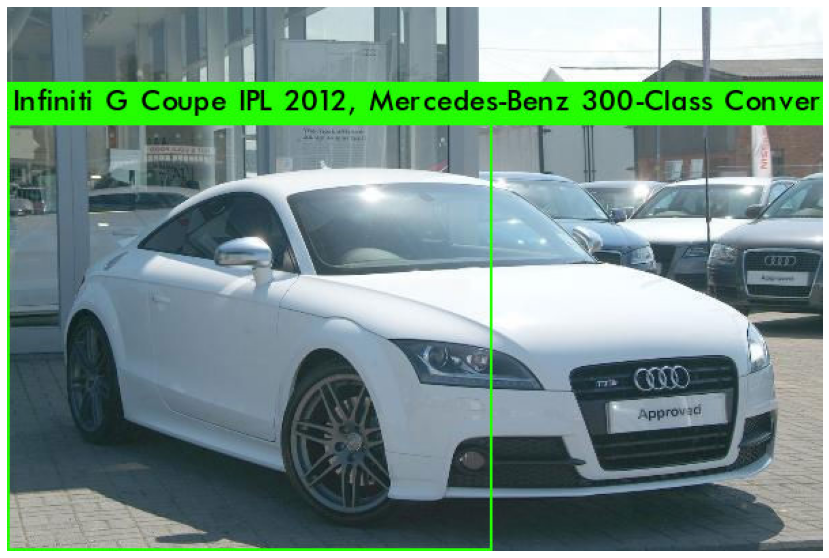

In [ ]:
show_detection('predictions.jpg')